In [1]:
import tbmodels
from yambopy import *
import matplotlib.pyplot as plt
from yambopy.lattice import car_red, red_car
import matplotlib.pylab as pylab
from pylab import rcParams
from matplotlib.ticker import MultipleLocator
import matplotlib.lines as mlines
# Set figure size and DPI globally
rcParams['figure.figsize'] = 6, 4  # 6 inches wide, 4 inches tall
rcParams['figure.dpi'] = 300  # 300 dots per inch

# Font sizes
rcParams['font.size'] = 20
rcParams['axes.titlesize'] = 20  # fontsize of the axes title
rcParams['axes.labelsize'] = 20  # fontsize of the x and y labels
rcParams['xtick.labelsize'] = 20  # fontsize of the tick labels
rcParams['ytick.labelsize'] = 20  # fontsize of the tick labels
rcParams['legend.fontsize'] = 16  # legend fontsize

# Line widths and marker sizes
rcParams['lines.linewidth'] = 2  # width of lines
rcParams['lines.markersize'] = 6  # size of markers

# Label, axis, and tick thickness
rcParams['axes.linewidth'] = 1.5  # axis line width
rcParams['xtick.major.width'] = 1.2  # width of the major tick lines
rcParams['ytick.major.width'] = 1.2  # width of the major tick lines

WORK_PATH='/Users/Reho0001/workQE/Projects/LiF/March2024'
YAMBO_TUT_PATH = f'/Users/Reho0001/workQE/Projects/LiF/yambo_tutorials/'
ry2ev=13.605703976

In [21]:
# Istance of useful classes
savedb_k = YamboSaveDB.from_db_file(f'{YAMBO_TUT_PATH}/unshifted-grid/triplets/SAVE')
lat_k = YamboLatticeDB.from_db_file(f'{YAMBO_TUT_PATH}/unshifted-grid/triplets/SAVE/ns.db1')
savedb_q = YamboSaveDB.from_db_file(f'{YAMBO_TUT_PATH}/unshifted-grid/triplets/2x2x2/SAVE')
lat_q = YamboLatticeDB.from_db_file(f'{YAMBO_TUT_PATH}/unshifted-grid/triplets/2x2x2/SAVE/ns.db1')

8 kpoints expanded to 64
3 kpoints expanded to 8


In [24]:
full_kpoints, kpoints_indexes, symmetry_indexes=savedb_k.expand_kpts()

8 kpoints expanded to 64


In [27]:
kpoints_indexes

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7])

In [6]:
full_kpoints_red = car_red(full_kpoints, lat_q.rlat)

In [7]:
# Generate list of q-points with weights
for i in range (len(full_kpoints_red)):
    print(f'{full_kpoints_red[i][0]:.10f}   {full_kpoints_red[i][1]:.10f}   {full_kpoints_red[i][2]:.10f} {1/len(full_kpoints_red):.10f}')

-0.0000000000   0.0000000000   0.0000000000 0.1250000000
-0.0000000000   0.0000000000   -0.5000000000 0.1250000000
0.5000000000   0.5000000000   0.5000000000 0.1250000000
-0.0000000000   -0.5000000000   0.0000000000 0.1250000000
-0.5000000000   0.0000000000   0.0000000000 0.1250000000
-0.0000000000   -0.5000000000   -0.5000000000 0.1250000000
0.5000000000   0.0000000000   0.5000000000 0.1250000000
-0.5000000000   -0.5000000000   0.0000000000 0.1250000000


In [3]:
# Create instance of real space Hamiltonian in MLWF basis
hrk=HR(f'{YAMBO_TUT_PATH}/unshifted-grid/nscf-wannier-qgrid/LiF')
hrq = HR(f'{YAMBO_TUT_PATH}/unshifted-grid/triplets/2x2x2/nscf-wannier-2x2x2/LiF')
#hrqexc=HR(f'{YAMBO_TUT_PATH}/unshifted-grid/nscf-wannier-kgrid/exc/LiF_exc')

Time for HR.__init__() : 3.9460012912750244 , read : 3.9445412158966064 , headstring 0.0014600753784179688
Time for HR.__init__() : 3.2132198810577393 , read : 3.2129480838775635 , headstring 0.00027179718017578125


In [8]:
hrk.HR_mn[0,:,:]

array([[ 0.014367+0.00e+00j, -0.01001 +1.56e-04j,  0.001157-2.00e-05j,
         0.010302-1.64e-04j,  0.011719-1.63e-04j,  0.000293-9.00e-06j,
         0.013632-3.44e-04j, -0.008573+1.24e-04j],
       [-0.010088-1.60e-04j,  0.014251-1.00e-06j,  0.010519+8.00e-06j,
        -0.009832+0.00e+00j, -0.005001-8.00e-06j, -0.007629-6.00e-06j,
        -0.005091+4.40e-05j,  0.007878+1.30e-05j],
       [-0.003858-5.90e-05j,  0.007655-7.00e-06j,  0.002553+0.00e+00j,
         0.001237-1.00e-06j, -0.001949+0.00e+00j,  0.001284+0.00e+00j,
        -0.026357+2.58e-04j, -0.003303-3.00e-06j],
       [ 0.009886+1.56e-04j, -0.010222+0.00e+00j, -0.004807-7.00e-06j,
         0.014311+1.00e-06j, -0.005726-1.10e-05j,  0.006557+4.00e-06j,
         0.041864-3.73e-04j, -0.004026-8.00e-06j],
       [ 0.004501+6.40e-05j, -0.00243 +3.00e-06j, -0.002345+2.00e-06j,
        -0.002356+6.00e-06j,  0.002559+0.00e+00j, -0.002175+3.00e-06j,
         0.008853-9.50e-05j, -0.002497+1.00e-06j],
       [ 0.000192+9.00e-06j, -0.011

In [4]:
# Create a grid
nnkp_kgrid = NNKP_Grids(f'{YAMBO_TUT_PATH}/unshifted-grid/nscf-wannier-qgrid/LiF', lat_k, yambo_grid=True)

Time for NNKP.__init__() : 0.005884885787963867


In [5]:
nnkp_qgrid = NNKP_Grids(f'{YAMBO_TUT_PATH}/unshifted-grid/triplets/2x2x2/nscf-wannier-2x2x2/LiF', lat_k, yambo_grid=True)

Time for NNKP.__init__() : 0.0020890235900878906


In [6]:
# We need all these auxiliary grids for wannierization of the BSE Hamiltonian
nnkp_kgrid.get_kmq_grid(nnkp_qgrid)
nnkp_kgrid.get_qpb_grid(nnkp_qgrid)
nnkp_qgrid.get_qpb_grid(nnkp_qgrid)
nnkp_kgrid.get_kpbover2_grid(nnkp_qgrid)
nnkp_kgrid.get_kmqmbover2_grid(nnkp_qgrid)

In [7]:
nnkp_kgrid.kmq_grid.shape

(64, 8, 3)

In [51]:
# Create a tb model of wannier run on qgrid
model_q = TBMODEL.from_wannier_files(
    hr_file=f'{YAMBO_TUT_PATH}/unshifted-grid/nscf-wannier-qgrid/LiF_hr.dat',
    wsvec_file=f'{YAMBO_TUT_PATH}/unshifted-grid/nscf-wannier-qgrid/LiF_wsvec.dat',
    #xyz_file=f'{WORK_PATH}/w90files/hBN_centres.xyz',
    win_file=f'{YAMBO_TUT_PATH}/unshifted-grid/nscf-wannier-qgrid/LiF.win'
)
model_q.set_mpgrid(nnkp_qgrid)

In [7]:
model = TBMODEL.from_wannier_files(
    hr_file=f'{YAMBO_TUT_PATH}/unshifted-grid/nscf-wannier-qgrid/LiF_hr.dat',
    wsvec_file=f'{YAMBO_TUT_PATH}/unshifted-grid/nscf-wannier-qgrid/LiF_wsvec.dat',
    #xyz_file=f'{WORK_PATH}/w90files/hBN_centres.xyz',
    win_file=f'{YAMBO_TUT_PATH}/unshifted-grid/nscf-wannier-qgrid/LiF.win'
)
model.set_mpgrid(nnkp_kgrid)

In [60]:
model_exc = TBMODEL.from_wannier_files(
    hr_file=f'{WORK_PATH}/March2024/nscf-wannier-kgrid/exc/LiF_exc_hr.dat',
    wsvec_file=f'{WORK_PATH}/March2024/nscf-wannier-kgrid/exc/LiF_exc_wsvec.dat',
    #xyz_file=f'{WORK_PATH}/w90files/hBN_centres.xyz',
    win_file=f'{WORK_PATH}/March2024/nscf-wannier-kgrid/exc/LiF_exc.win'
)
model_exc.set_mpgrid(nnkp_qgrid)

In [14]:
# Define path in reduced coordinates using Class Path
npoints = 30
path_kpoints = Path([[[  0.5,  0.250,  0.750],'W'],
                     [[0.5,0.5,  0.5],'L'],
              #[[  0.375,  0.375,  0.750],'K'],    
              [[  0.0,  0.0,  0.0],'$\Gamma$'],
              #[[  0.625,  0.250,  0.625],'U'],
              [[  0.5,  0.0,  0.5],'X'],
              [[  0.5,  0.250,  0.750],'W']],[npoints,npoints,npoints,npoints] )
              #[[  0.750,  0.250,  0.5],'W2'],
              
kpoints_red = path_kpoints.get_klist()[:,0:3]
kpoints_car = red_car(kpoints_red, lat_k.rlat)
kdistance = path_kpoints.distances
kpoints = path_kpoints.kpoints

## Orbital projected bands

In [78]:
unshiftedgrid_path = '/Users/Reho0001/workQE/Projects/LiF/yambo_tutorials/unshifted-grid/'

In [9]:
lat  = YamboSaveDB.from_db_file(folder=f'{unshiftedgrid_path}/database/SAVE/',filename='ns.db1')

NameError: name 'unshiftedgrid_path' is not defined

Running projwfcxml for QE version 6.7


/var/folders/hx/z4tmr0ln4bdct36z3dr7ppt80000gp/T/ipykernel_29145/2301953140.py:34: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[0]._sizes = [dotsize]
/var/folders/hx/z4tmr0ln4bdct36z3dr7ppt80000gp/T/ipykernel_29145/2301953140.py:35: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[1]._sizes = [dotsize]
/var/folders/hx/z4tmr0ln4bdct36z3dr7ppt80000gp/T/ipykernel_29145/2301953140.py:36: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[2]._sizes = [dotsize]
/var/folders/hx/z4tmr0ln4bdct36z3dr7ppt80000gp/T/ipykernel_29145/2301953140.py:37: MatplotlibDeprecationWarning: The legendHand

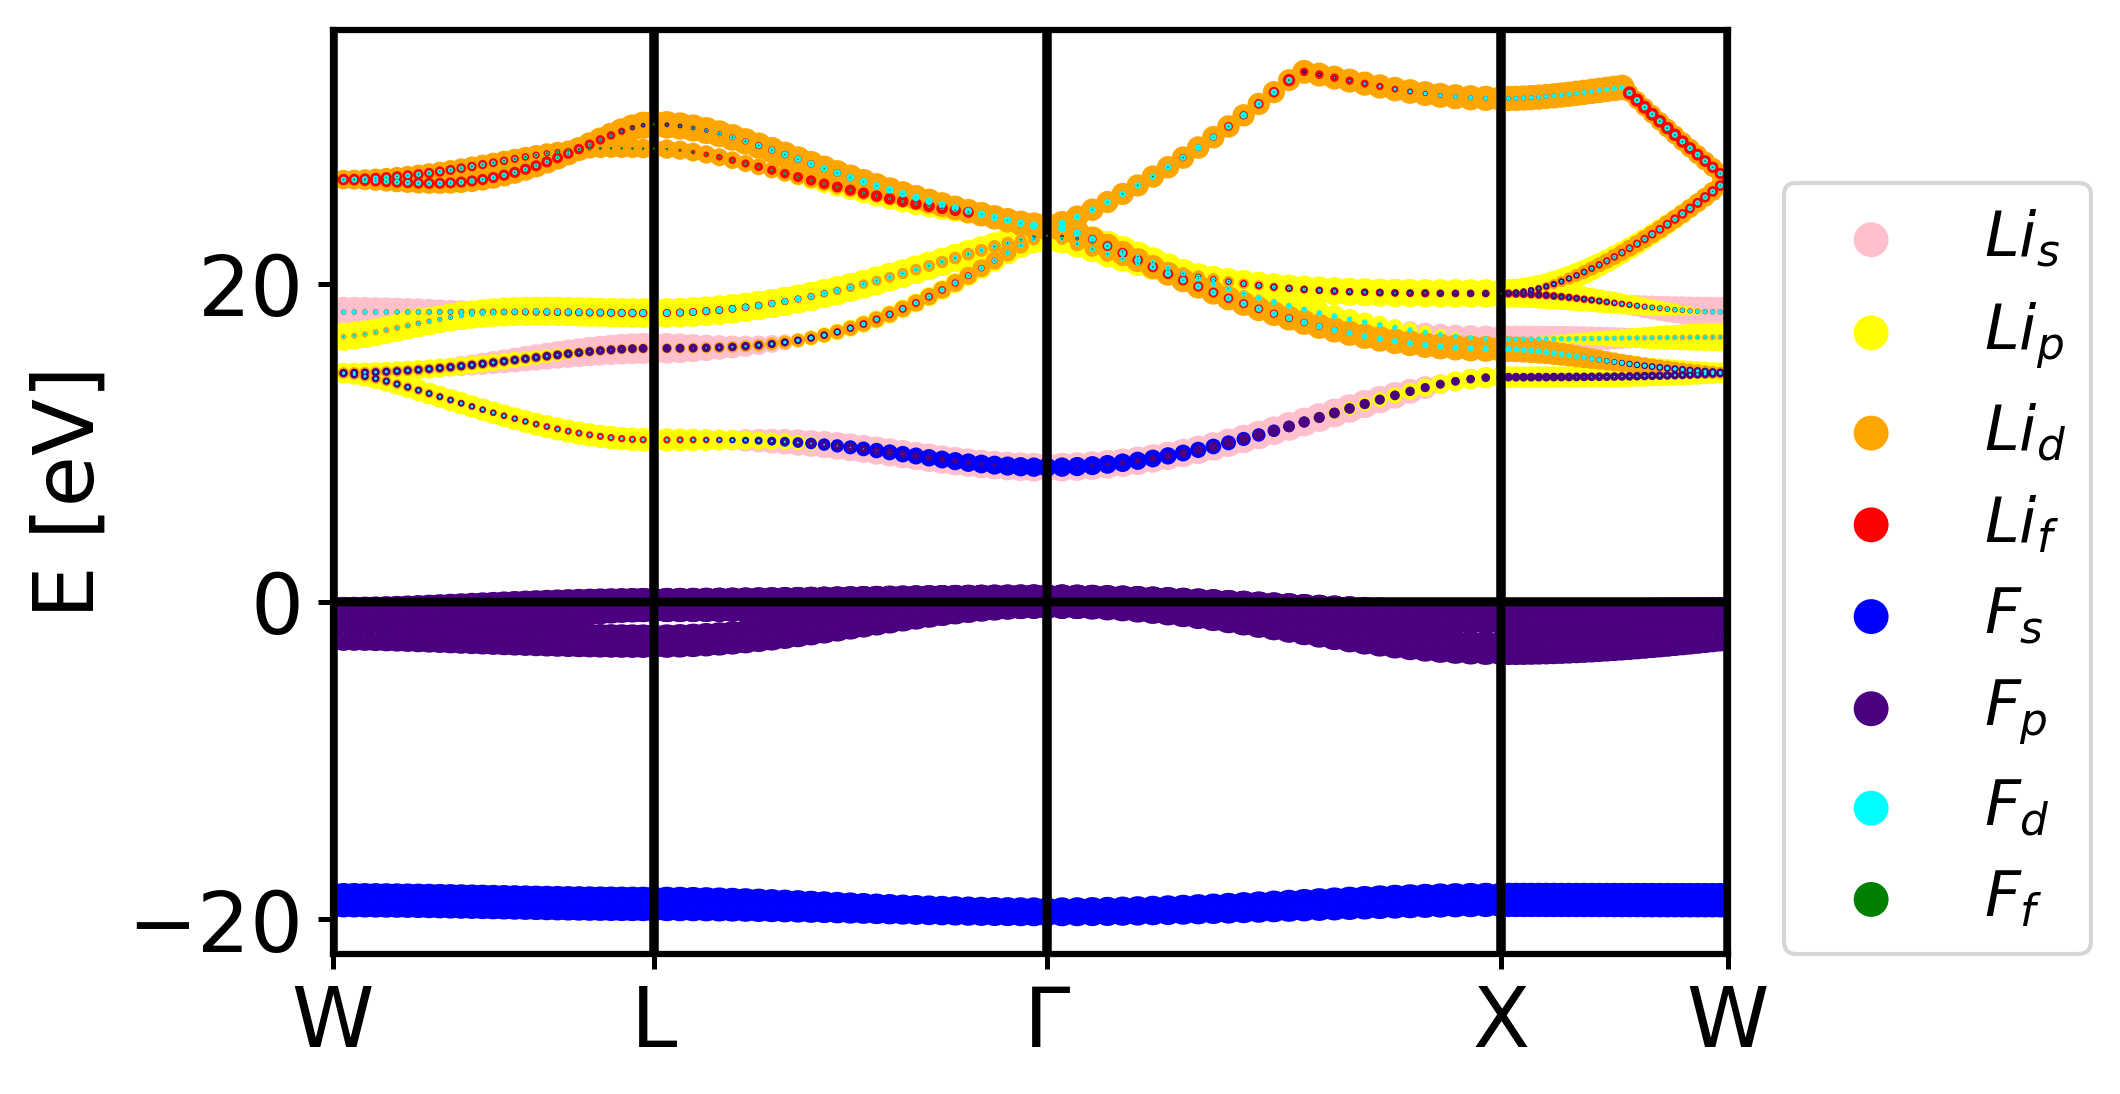

In [80]:
fig,ax = plt.subplots(dpi=300)
dotsize = 10
atom_Li_s = [0]
atom_Li_p = [1,2,3]
atom_Li_d = [4,5,6,7,8]
atom_Li_f = [9,10,11,12,13,14,15,15]
atom_F_s = [16]
atom_F_p = [17,18,19]
atom_F_d = [20,21,22,23,24,25,26]
atom_F_f = [27,28,29,30,31]
ticks, labels =list(zip(*path_kpoints.get_indexes()))
dotsize=70
band = ProjwfcXML(prefix='LiF',path=f'{unshiftedgrid_path}/bands/',qe_version='6.7')
nelectrons = 8
Li_s = band.plot_eigen(ax,path_kpoints=path_kpoints,selected_orbitals=atom_Li_s,color='pink',size=dotsize)
Li_p = band.plot_eigen(ax,path_kpoints=path_kpoints,selected_orbitals=atom_Li_p,color='yellow',size=dotsize)
Li_d = band.plot_eigen(ax,path_kpoints=path_kpoints,selected_orbitals=atom_Li_d,color='orange',size=dotsize)
Li_f = band.plot_eigen(ax,path_kpoints=path_kpoints,selected_orbitals=atom_Li_f,color='red',size=dotsize)
F_s = band.plot_eigen(ax,path_kpoints=path_kpoints,selected_orbitals=atom_F_s,color='blue',size=dotsize)
F_p = band.plot_eigen(ax,path_kpoints=path_kpoints,selected_orbitals=atom_F_p,color='indigo',size=dotsize)
F_d = band.plot_eigen(ax,path_kpoints=path_kpoints,selected_orbitals=atom_F_d,color='cyan',size=dotsize)
F_f = band.plot_eigen(ax,path_kpoints=path_kpoints,selected_orbitals=atom_F_f,color='green',size=dotsize)
Li_s.set_label(r'$Li_s$')
Li_p.set_label(r"$Li_p$")
Li_d.set_label(r'$Li_d$')
Li_f.set_label(r"$Li_f$")
F_s.set_label(r'$F_s$')
F_p.set_label(r'$F_p$')
F_d.set_label(r'$F_d$')
F_f.set_label(r'$F_f$')
ax.set_ylabel('E [eV]')
#ax.set_ylim([-5,20])
lgnd = plt.legend(loc=(1.04, 0), scatterpoints=1, markerscale=20, fontsize=15)
lgnd.legendHandles[0]._sizes = [dotsize]
lgnd.legendHandles[1]._sizes = [dotsize]
lgnd.legendHandles[2]._sizes = [dotsize]
lgnd.legendHandles[3]._sizes = [dotsize]
lgnd.legendHandles[4]._sizes = [dotsize]
lgnd.legendHandles[5]._sizes = [dotsize]
lgnd.legendHandles[6]._sizes = [dotsize]
lgnd.legendHandles[7]._sizes = [dotsize]
#plt.savefig(f'{unshiftedgrid_path}/bands/full_orbbands.pdf',bbox_inches='tight')

## Compare with wannier

In [81]:
xml = ProjwfcXML(prefix='LiF',path=f'{unshiftedgrid_path}/bands/',qe_version='6.7')

Running projwfcxml for QE version 6.7


In [62]:
kpoints_dists= np.array(kpoints_dists)

In [70]:
labels

('W', 'L', '$\\Gamma$', 'X', 'W')

Running projwfcxml for QE version 6.7


(-5.0, 26.0)

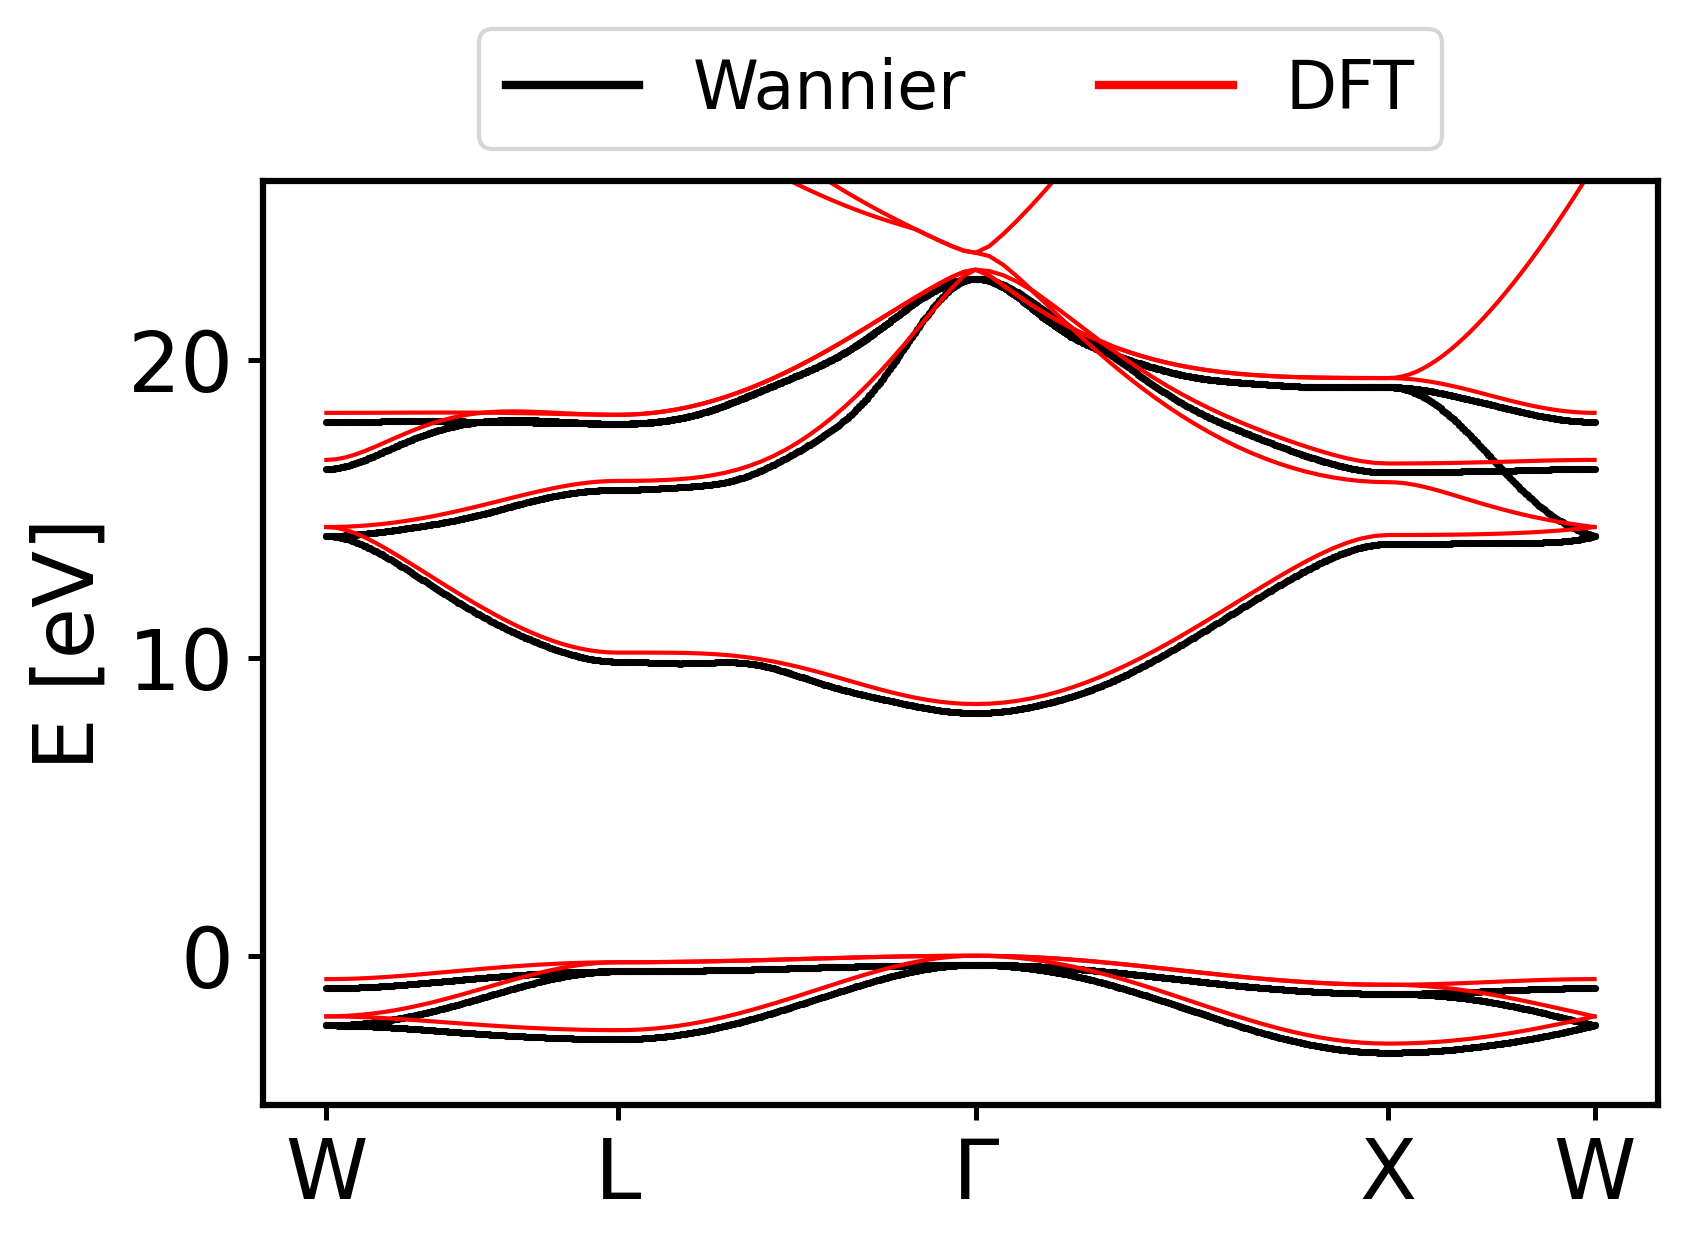

In [22]:
from qepy.lattice import Path, calculate_distances 
# Class PwXML. QE database reading
xml = ProjwfcXML(prefix='LiF',path=f'{YAMBO_TUT_PATH}/unshifted-grid/bands/',qe_version='6.7')
wann_bands = np.loadtxt(f'{YAMBO_TUT_PATH}/unshifted-grid/nscf-wannier-kgrid/LiF_band.dat',usecols=(0,1))
# Class PwXML. QE database reading
fig, ax = plt.subplots()
kpoints_dists = calculate_distances(xml.kpoints[:xml.nkpoints])
ticks, labels =list(zip(*path_kpoints.get_indexes()))
#xml.plot_eigen_ax(ax, path_kpoints, y_offset=-1., lw =1, ylim=(-4,17))
for ib in range(xml.nbands):
  ax.plot(kpoints_dists, xml.eigen[:,ib], c='red',lw=1.0)
ax.scatter(wann_bands[:,0]/np.max(wann_bands[:,0])*np.max(kpoints_dists), wann_bands[:,1], c='black',s=0.5)
# tb_eb = tb_ebands.add_kpath_labels(ax)
legend_entries = [
    mlines.Line2D([], [], color='black', ls ='-', label='Wannier'),
    mlines.Line2D([], [], color='red', label='DFT'),
]
kpoints_dists= np.array(kpoints_dists)
ax.set_xticks(kpoints_dists[np.array(ticks)], labels)
# # Add custom legend outside the loop
ax.legend(handles=legend_entries, loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3)
# ax.plot(qe_en, qe_bands)
ax.set_ylabel('E [eV]')
ax.set_ylim(-5,26)
#plt.show()
#plt.savefig(f'{unshiftedgrid_path}/DFTvsWann_q.pdf',bbox_inches='tight')


In [18]:
from qepy.lattice import Path, calculate_distances 
# Class PwXML. QE database reading
xml = ProjwfcXML(prefix='LiF',path=f'{unshiftedgrid_path}/bands/',qe_version='6.7')
wann_bands = np.loadtxt(f'{unshiftedgrid_path}/nscf-wannier-qgrid/LiF_band.dat',usecols=(0,1))
# Class PwXML. QE database reading
fig, ax = plt.subplots()
kpoints_dists = calculate_distances(xml.kpoints[:xml.nkpoints])
#xml.plot_eigen_ax(ax, path_kpoints, y_offset=-1., lw =1, ylim=(-4,17))
for ib in range(xml.nbands):
  ax.plot(kpoints_dists, xml.eigen[:,ib], c='red',lw=1.0)
ax.scatter(wann_bands[:,0]/np.max(wann_bands[:,0])*np.max(kpoints_dists), wann_bands[:,1], c='black',s=0.5)
# tb_eb = tb_ebands.add_kpath_labels(ax)
legend_entries = [
    mlines.Line2D([], [], color='black', ls ='-', label='Wannier'),
    mlines.Line2D([], [], color='red', label='DFT'),
]
ticks, labels =list(zip(*path_kpoints.get_indexes()))
kpoints_dists= np.array(kpoints_dists)
#ax.set_xticks(kpoints_dists[np.array(ticks)], labels)
# # Add custom legend outside the loop
ax.legend(handles=legend_entries, loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3)
# ax.plot(qe_en, qe_bands)
ax.set_ylabel('E [eV]')
ax.set_ylim(-5,26)
plt.savefig(f'{unshiftedgrid_path}/DFTvsWann_k.pdf',bbox_inches='tight')


NameError: name 'unshiftedgrid_path' is not defined

In [240]:
path_kpoints.get_klist().shape

(801, 4)

In [11]:
model.mpgrid.k

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.125],
       [ 0.   ,  0.   ,  0.25 ],
       ...,
       [-0.125, -0.125, -0.375],
       [-0.125, -0.125, -0.25 ],
       [-0.125, -0.125, -0.125]])

In [9]:
H_atk = model.solve_ham_from_hr(lat_k, hrk , fermie = 3.0)
#H_atk = model.solve_ham(kpoints_red)#, fermie = 3.0)
E_k_tb= np.array(model.eigenval(kpoints_red))
E_k= np.array(model.get_eigenval(kpoints_red,from_hr=True))
#E_k= np.array(model.get_eigenval(kpoints_car))
nbands = E_k.shape[1]
nkpoints = E_k.shape[0]

Diagonalization took 0.006 s


In [80]:
hrk.HR_mn[1]

array([[ 1.049e-03+0.j, -1.161e-03+0.j, -1.161e-03+0.j, -1.161e-03+0.j,
         8.800e-05+0.j,  2.090e-04+0.j,  2.090e-04+0.j, -8.200e-05+0.j],
       [ 1.161e-03+0.j,  4.418e-03+0.j, -1.364e-03+0.j, -1.364e-03+0.j,
        -5.800e-05+0.j, -7.210e-04+0.j, -4.830e-04+0.j, -3.000e-05+0.j],
       [ 1.161e-03+0.j, -1.364e-03+0.j,  4.418e-03+0.j, -1.364e-03+0.j,
        -5.800e-05+0.j, -4.830e-04+0.j, -7.210e-04+0.j, -3.000e-05+0.j],
       [ 1.161e-03+0.j, -1.364e-03+0.j, -1.364e-03+0.j,  4.418e-03+0.j,
         3.690e-04+0.j,  3.400e-05+0.j,  3.400e-05+0.j,  1.850e-04+0.j],
       [-4.600e-05+0.j, -1.690e-04+0.j, -1.690e-04+0.j, -2.120e-04+0.j,
         1.900e-05+0.j, -5.200e-05+0.j, -5.200e-05+0.j, -5.200e-05+0.j],
       [ 1.050e-04+0.j, -1.730e-04+0.j, -2.400e-04+0.j, -2.230e-04+0.j,
         5.200e-05+0.j,  3.600e-05+0.j,  1.900e-05+0.j,  1.900e-05+0.j],
       [ 1.050e-04+0.j, -2.400e-04+0.j, -1.730e-04+0.j, -2.230e-04+0.j,
         5.200e-05+0.j,  1.900e-05+0.j,  3.600e-05+0.j,  1

In [9]:
tb_ebands = YambopyBandStructure(E_k,kpoints_red,kpath=path_kpoints)
tb_kdist = tb_ebands.distances

NameError: name 'E_k' is not defined

In [27]:
YAMBO_TUT_PATH

'/Users/Reho0001/workQE/Projects/LiF/yambo_tutorials/'

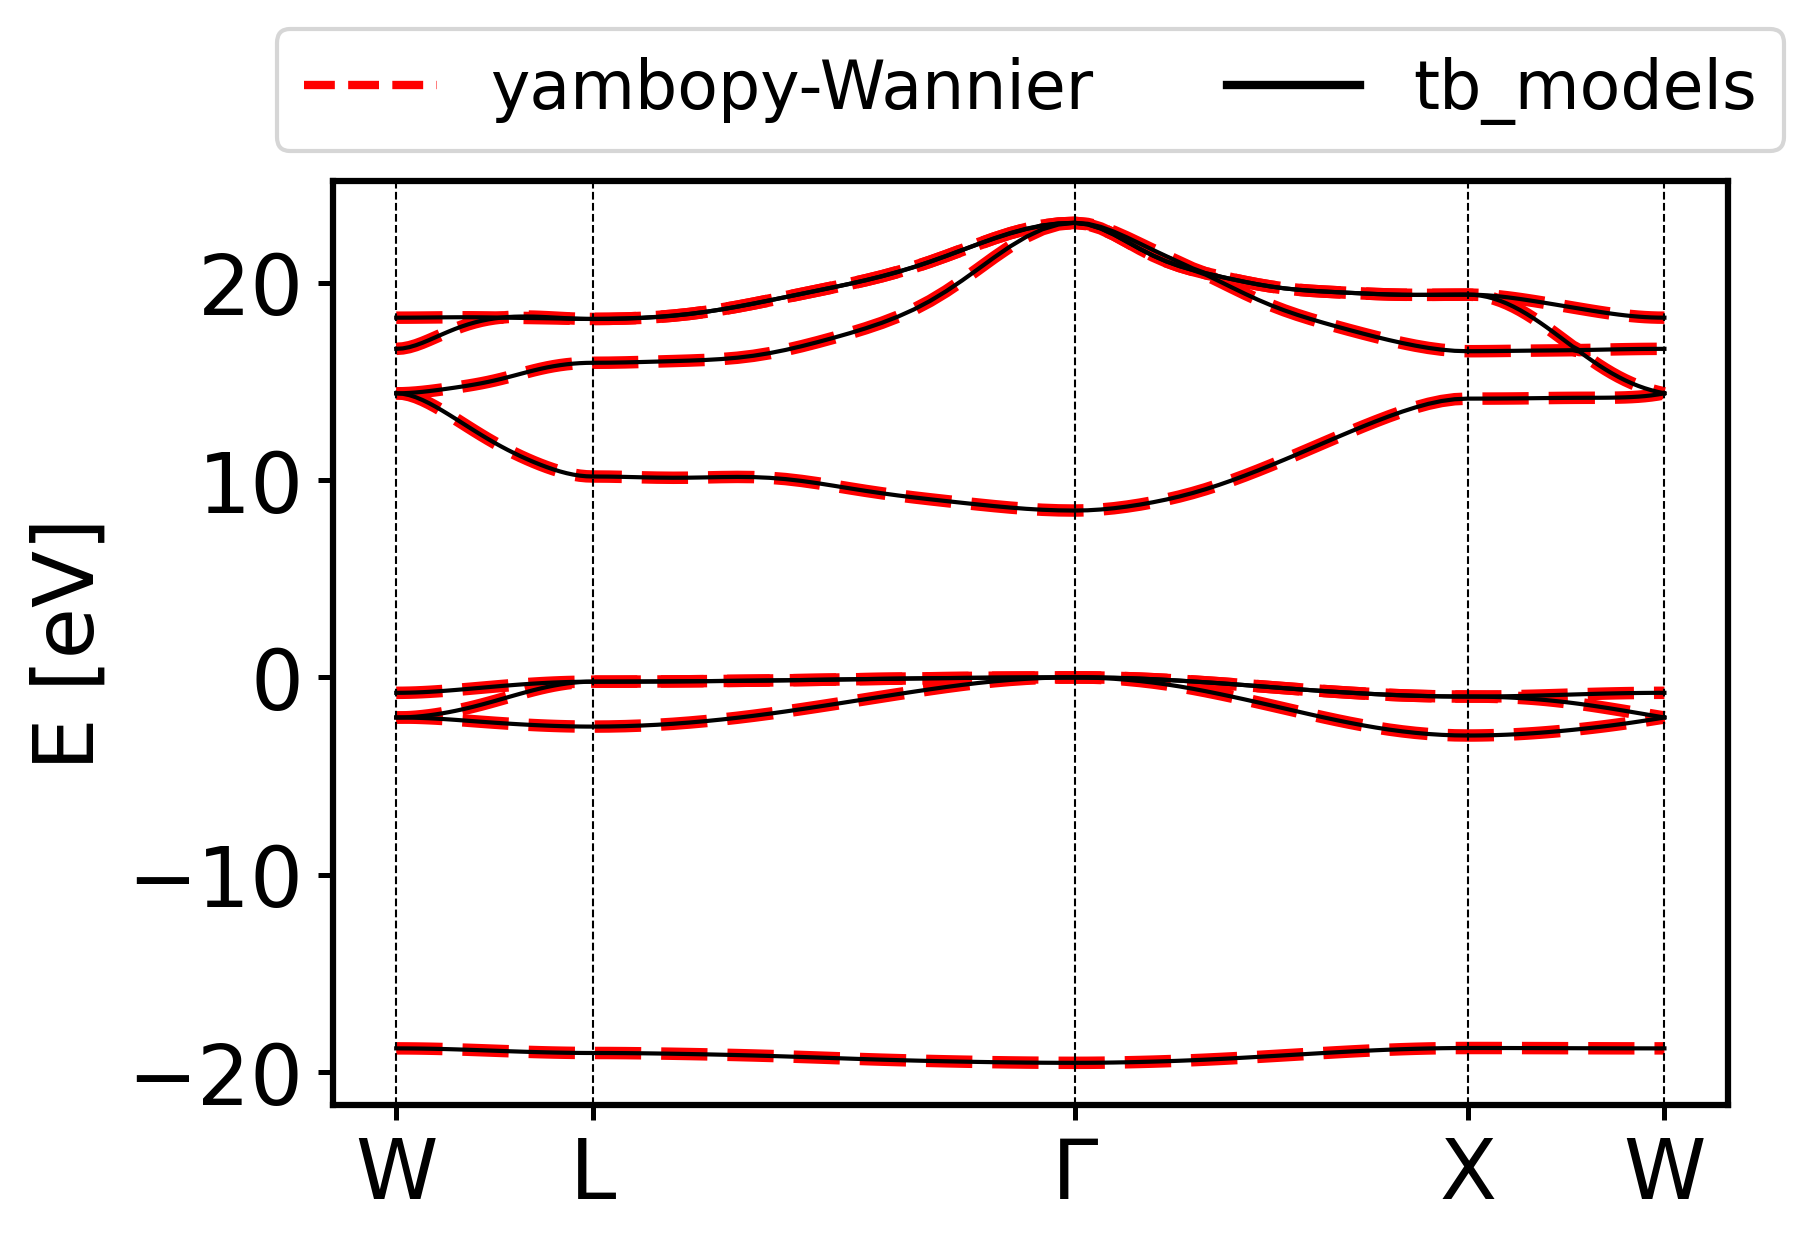

In [26]:
# Class PwXML. QE database reading
xml = PwXML(prefix='LiF',path=f'{YAMBO_TUT_PATH}/unshifted-grid/bands/')
wann_bands = np.loadtxt(f'{YAMBO_TUT_PATH}/unshifted-grid/nscf-wannier-kgrid/LiF_band.dat',usecols=(0,1))
# Class PwXML. QE database reading
fig, ax = plt.subplots()
#xml.plot_eigen_ax(ax, path_kpoints, y_offset=-1., lw =1, ylim=(-4,17))
#for ib in range(xml.nbands):
#  ax.plot(tb_kdist, xml.eigen1[:,ib], c='red',lw=1.0)
for ib in range(nbands):
  ax.plot(tb_kdist, E_k[:,ib]-np.max(E_k[:,2]), c='red', ls = '--', lw=3.0)
for ib in range(nbands):
  ax.plot(tb_kdist, E_k_tb[:,ib]-np.max(E_k_tb[:,2]), c='black', ls = '-', lw=1.0)  
#ax.scatter(wann_bands[:,0]/np.max(wann_bands[:,0])*np.max(tb_kdist), wann_bands[:,1], c='black',s=0.5)
tb_eb = tb_ebands.add_kpath_labels(ax)
legend_entries = [
    mlines.Line2D([], [], color='red', ls ='--', label='yambopy-Wannier'),
    mlines.Line2D([], [], color='black', label='tb_models'),
]

# Add custom legend outside the loop
ax.legend(handles=legend_entries, loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3)
# ax.plot(qe_en, qe_bands)
ax.set_ylabel('E [eV]')
#ax.set_ylim(-40,-18)
plt.savefig(f'{YAMBO_TUT_PATH}/unshifted-grid/yambopyvstbmodels_q.png',bbox_inches='tight')


In [20]:
qe_db.shape

(910, 2)

(-4.0, 12.0)

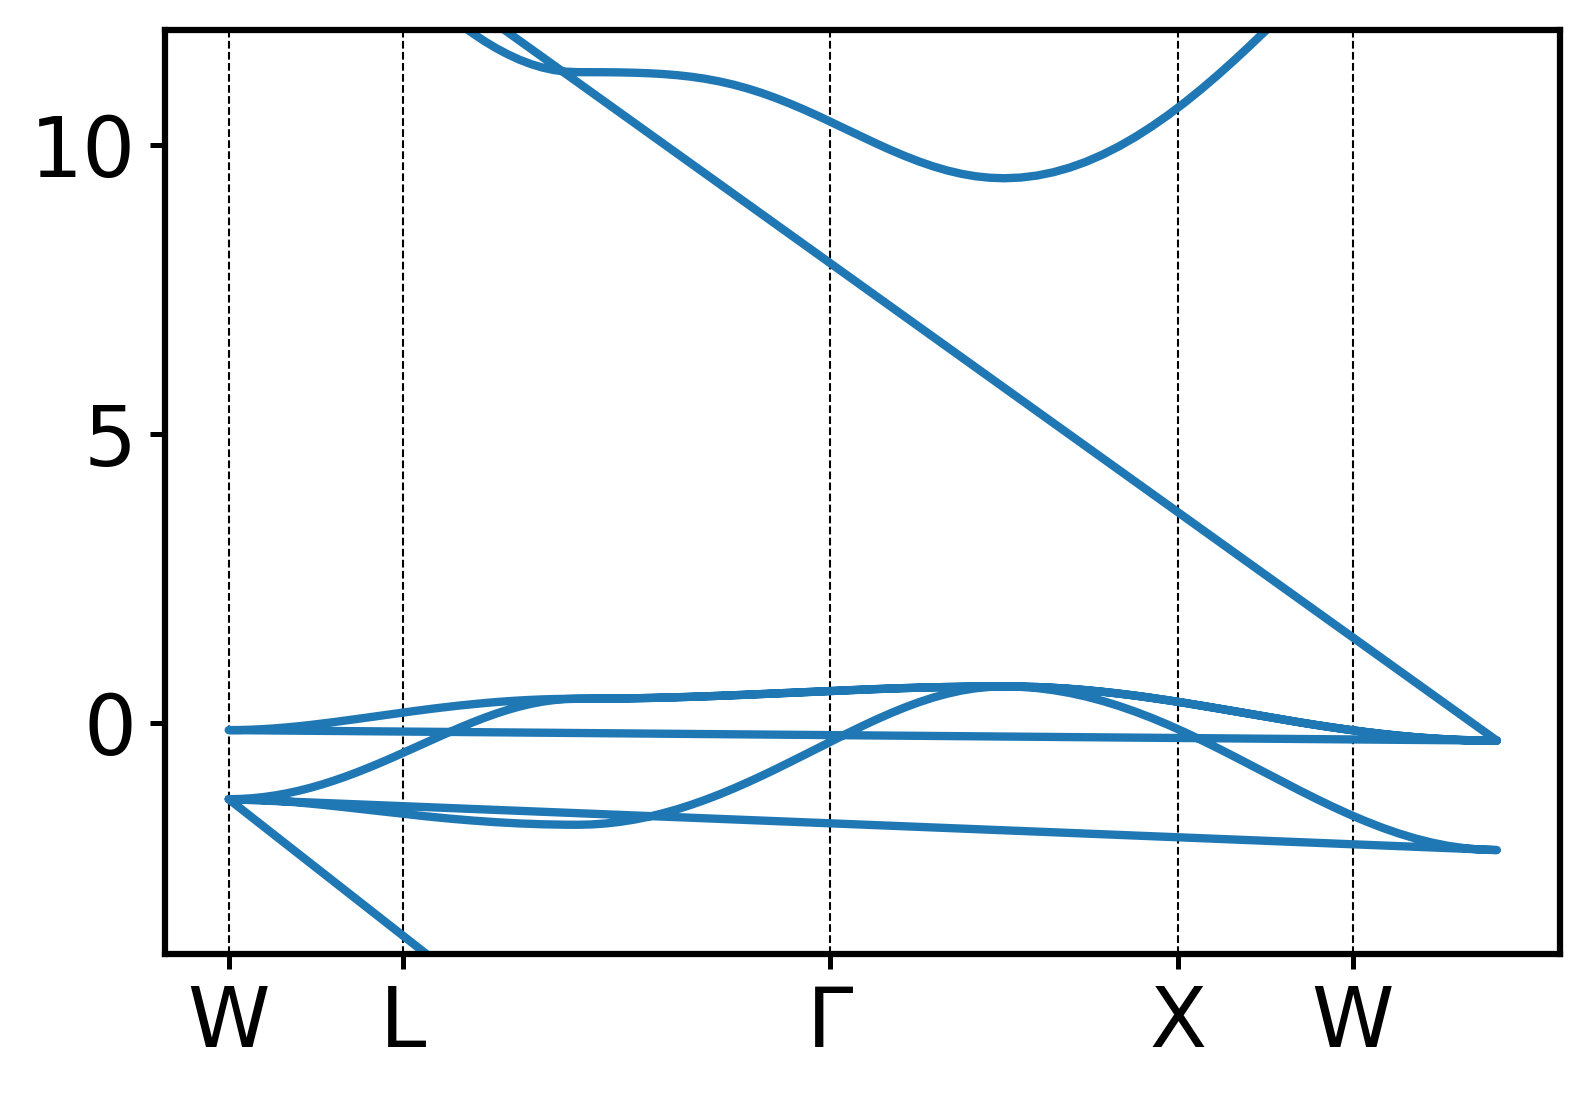

In [64]:
tb_ebands = YambopyBandStructure(E_k,kpoints_red,kpath=path_kpoints)
qe_db = np.loadtxt('bands/LiF-bands.dat.gnu')
qe_en = qe_db[:,0] 
qe_bands = qe_db[:,1]
tb_kdist = tb_ebands.distances
tb_eb = tb_ebands.bands
fig,ax = plt.subplots()
tb_eb = tb_ebands.add_kpath_labels(ax)
# for ib in range(nbands):
#   ax.plot(tb_kdist, E_k[:,ib], c='black')
ax.plot(qe_en, qe_bands)
ax.set_ylim(-4,12)

(-2.0, 12.0)

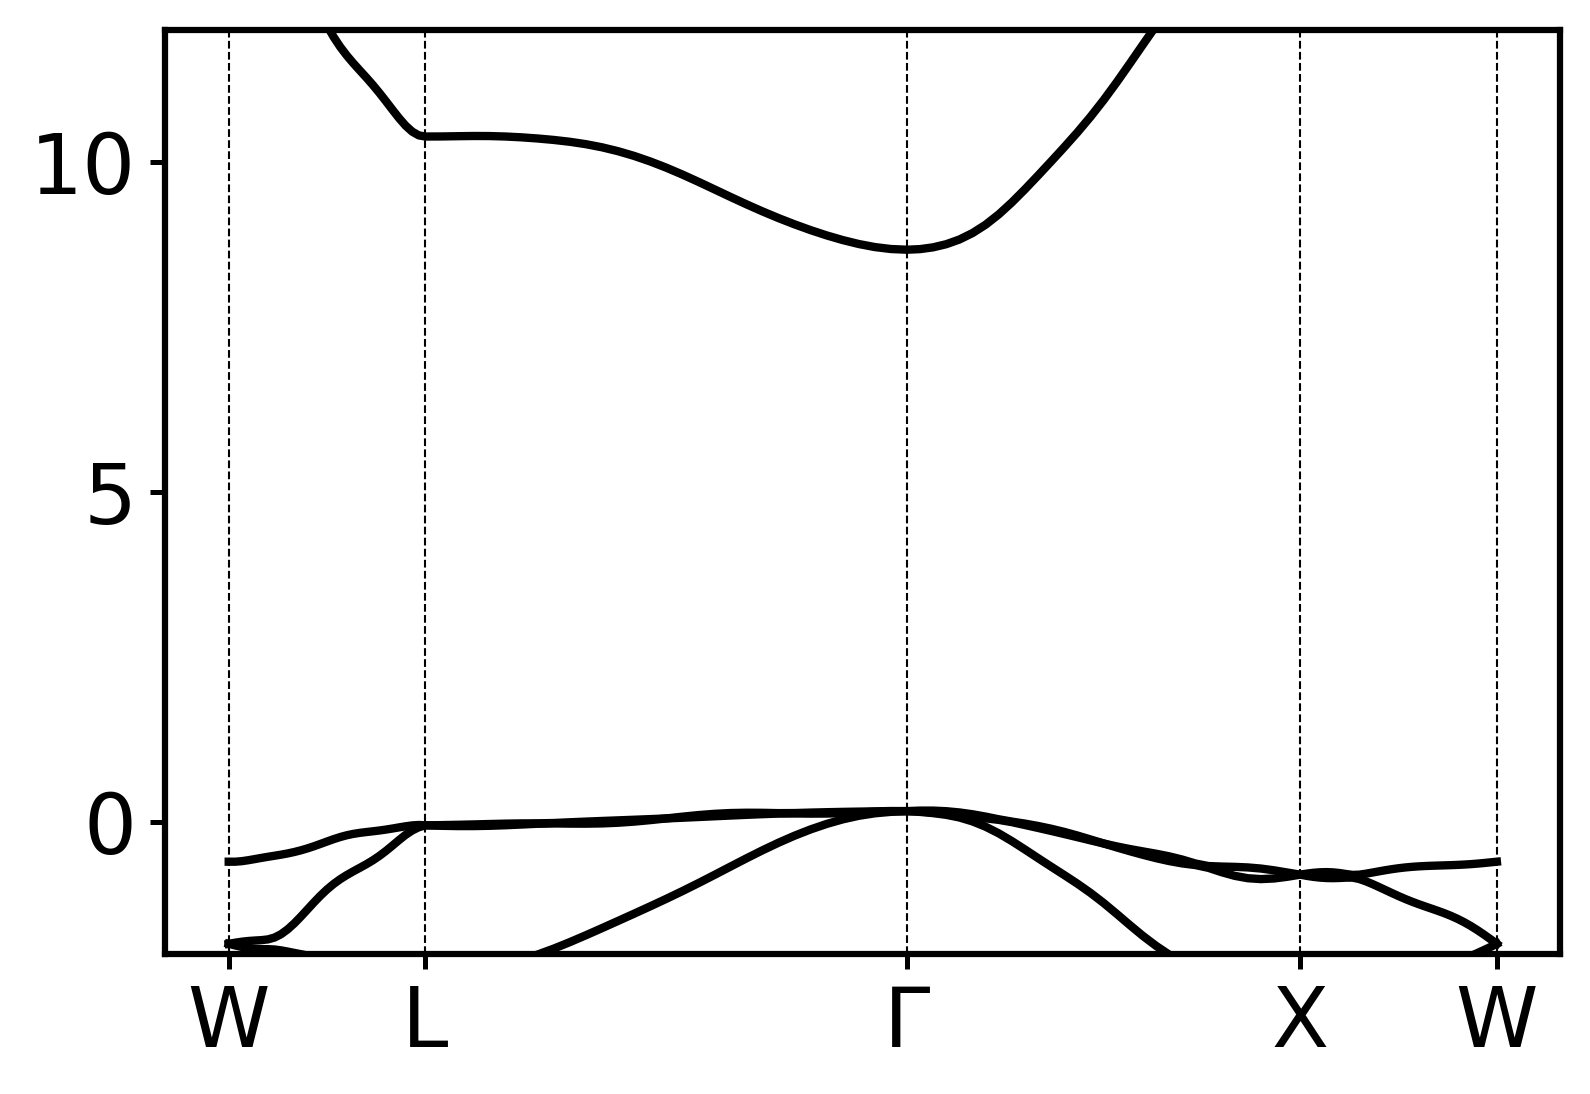

In [49]:
tb_ebands = YambopyBandStructure(E_k,kpoints_red,kpath=path_kpoints)
qe_db = np.loadtxt('bands/LiF-bands.dat.gnu', usecols = (0,1))
qe_en = qe_db[:,0] 
qe_bands = qe_db[:,1]
tb_kdist = tb_ebands.distances
tb_eb = tb_ebands.bands
fig,ax = plt.subplots()
tb_eb = tb_ebands.add_kpath_labels(ax)
for ib in range(nbands):
  ax.plot(tb_kdist, E_k[:,ib], c='black')
# ax.plot(qe_en, qe_bands)
ax.set_ylim(-2,12)

In [11]:
# Define path in reduced coordinates using Class Path
npoints = 30
pathexc_qpoints = Path([[[0.5,0.5,  0.5],'L'],
                        [[  0.0,  0.0,  0.0],'$\Gamma$'],
                        [[  0.5,  0.0,  0.5],'X'],
                        [[  0.5,  0.250,  0.750],'W'],
                        [[  0.5,  0.50,  0.50],'L']],[npoints,npoints,npoints,npoints] )
              #[[  0.750,  0.250,  0.5],'W2'],
              
qpointsexc_red = pathexc_qpoints.get_klist()[:,0:3]
qpointsexc_car = red_car(qpointsexc_red, lat_q.rlat)
qdistance = pathexc_qpoints.distances
qpoints = pathexc_qpoints.kpoints

In [29]:
Hexc_atq = model_exc.solve_ham_from_hr(lat_q, hrqexc , fermie = 3.0)
Eexc_k= np.array(model_exc.eigenval(qpointsexc_red))
nbands = Eexc_k.shape[1]
nkpoints = Eexc_k.shape[0]

Diagonalization took 0.006 s


29 kpoints expanded to 512


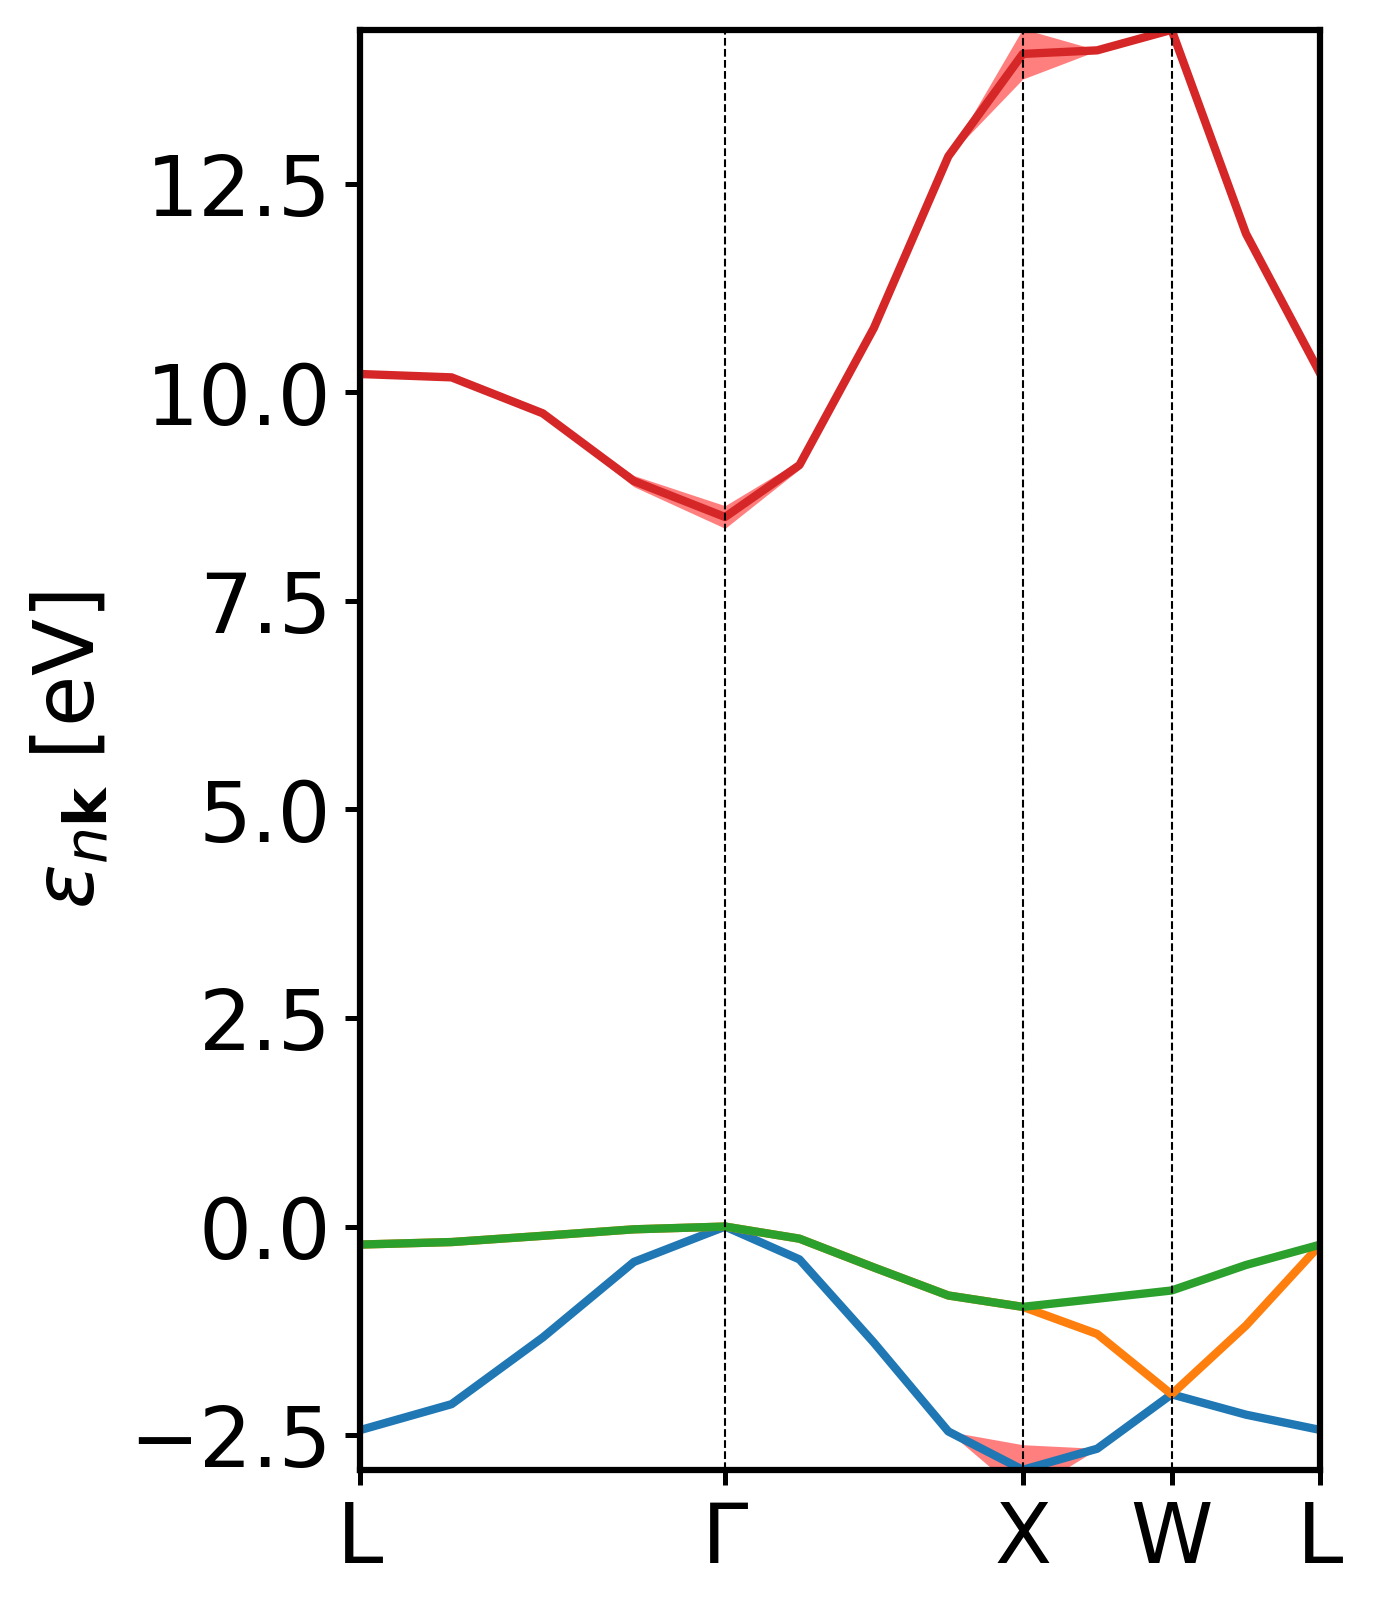

In [44]:
save_path='March2024/database-k'
bse_path ='March2024/database-k/bse-31'
from qepy import *
# Customly chosen Q-point
iQ=0 # 0-> Gamma point, i.e., optical absorption limit
# States to be merged together (because they are degenerate)
#
# You may try the following states:
# 
# [1,2], [3,4], [5], [6,7]
#
states = [0,1,2,3]


# Create "lattice" object by reading the ns.db1 database inside the yambo SAVE
ylat = YamboLatticeDB.from_db_file(filename=save_path+'/SAVE/ns.db1')

# Read exciton data at Q=iQ
yexc = YamboExcitonDB.from_db_file(ylat,filename=bse_path+'/ndb.BS_diago_Q1')


## [2.] Read electron energies
yel = YamboSaveDB.from_db_file(folder=save_path+'/SAVE')


## [3.A] Plot without interpolating the values
fig = plt.figure(figsize=(4,6))
ax  = fig.add_axes( [ 0.15, 0.15, 0.80, 0.80 ])

exc_on_bands = yexc.get_exciton_bs(yel,pathexc_qpoints,states,size=.01)
exc_on_bands.plot_ax(ax,color_bands='grey',c_weights='red')

# ax.set_ylim(-7.5,12.)
plt.show()


# fig = plt.figure(figsize=(4,6))
# ax  = fig.add_axes( [ 0.15, 0.15, 0.80, 0.80 ])

# # In case of problems with the interpolation, try to increase lpratio
# exc_on_bands = yexc.interpolate(yel,pathexc_qpoints,states,lpratio=10,f=None,size=0.5,verbose=True)
# exc_on_bands.plot_ax(ax,color_bands='grey',c_weights='red',alpha_weights=0.5)

# ax.set_ylim(-7.5,12.)
# plt.show()

#                  #
# End Yambopy part #
#                  #



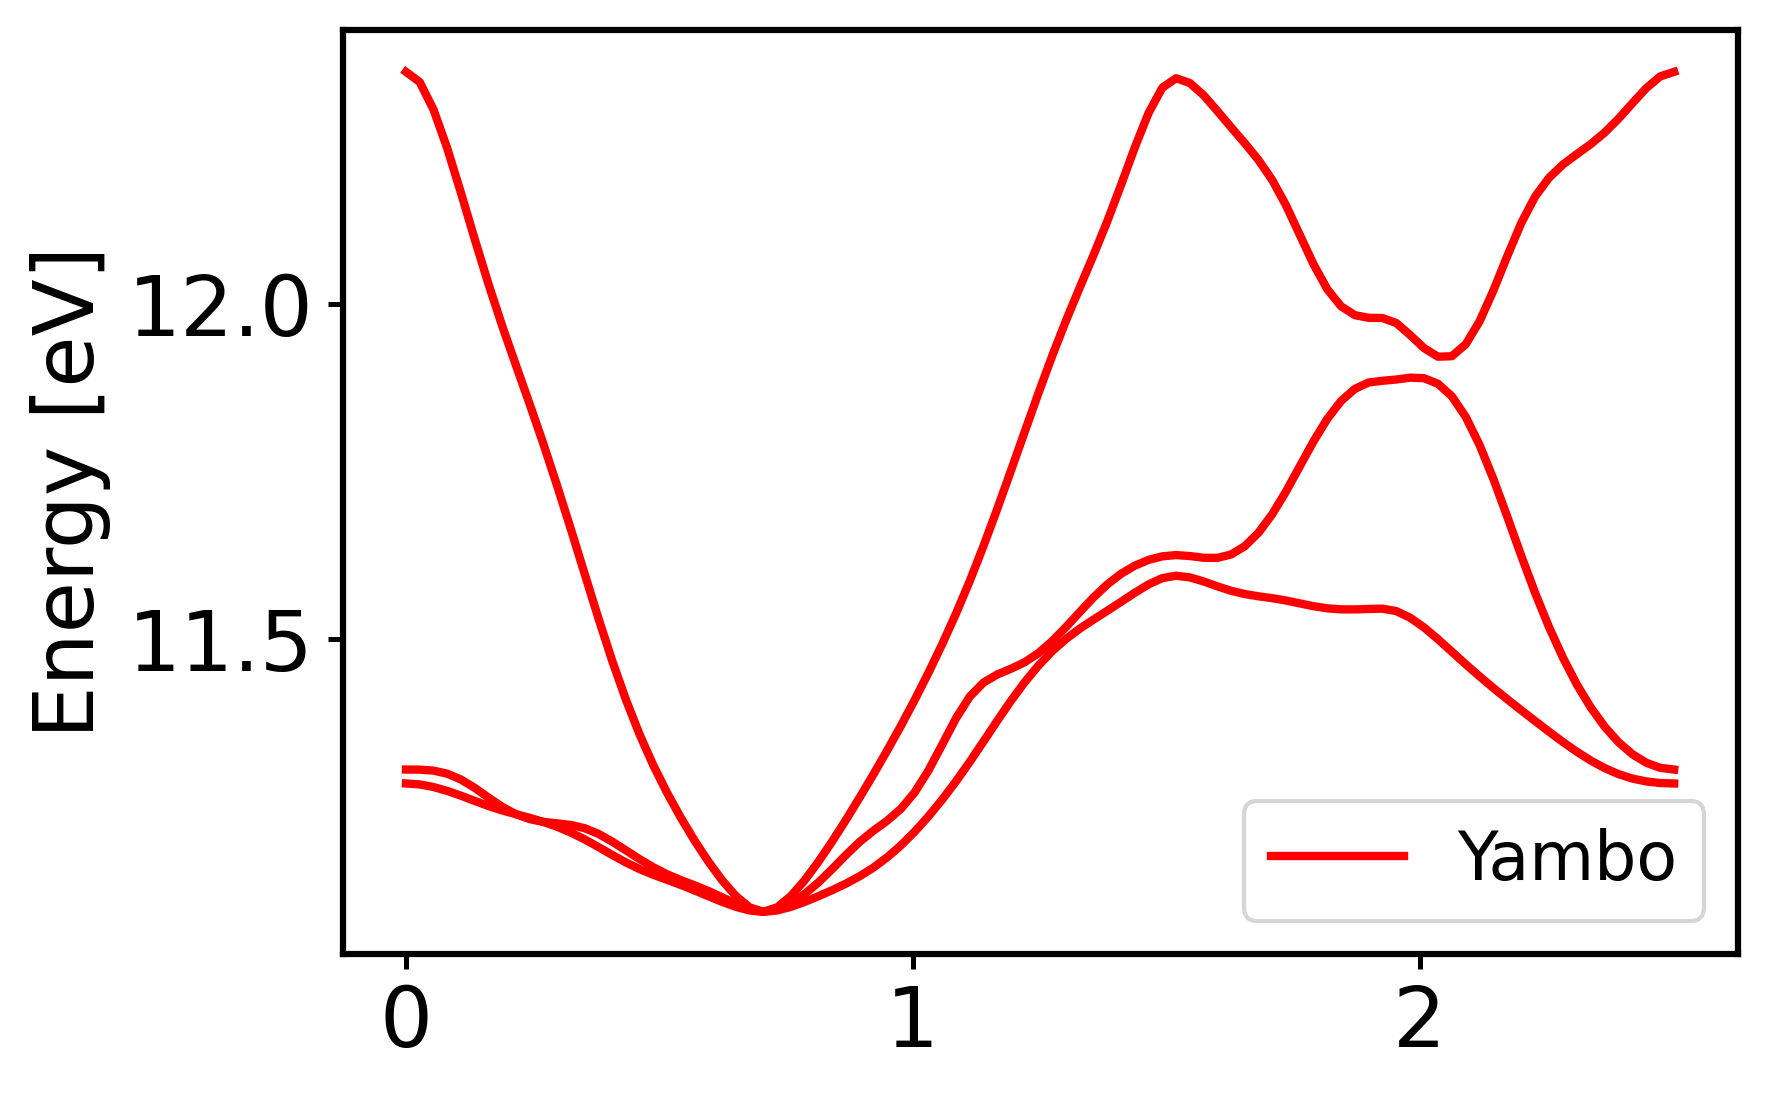

In [73]:
tb_ebands = YambopyBandStructure(Eexc_k,qpointsexc_red,kpath=pathexc_qpoints)
tb_kdist = tb_ebands.distances
tb_eb = tb_ebands.add_kpath_labels(ax)
data_k_31 = np.loadtxt(f'{WORK_PATH}/March2024/database-k/bse-bands-31/o-bse-bands-31.excitons_interpolated', usecols=[0,1,2,3])
fig,ax = plt.subplots()
ax.plot(data_k_31[:,0],data_k_31[:,1], color = 'red', label='Yambo')
ax.plot(data_k_31[:,0],data_k_31[:,2], color = 'red')
ax.plot(data_k_31[:,0],data_k_31[:,3], color = 'red')
ax.set_ylabel('Energy [eV]')
ax.set_xlabel('')
# tb_eb = tb_ebands.add_kpath_labels(ax)
#ax.set_ylim([-14.5,-12.2])
# for ib in range(nbands):
#   ax.plot(tb_kdist, Eexc_k[:,ib], c='black', label='Wannier', ls = '--')
ax.legend()


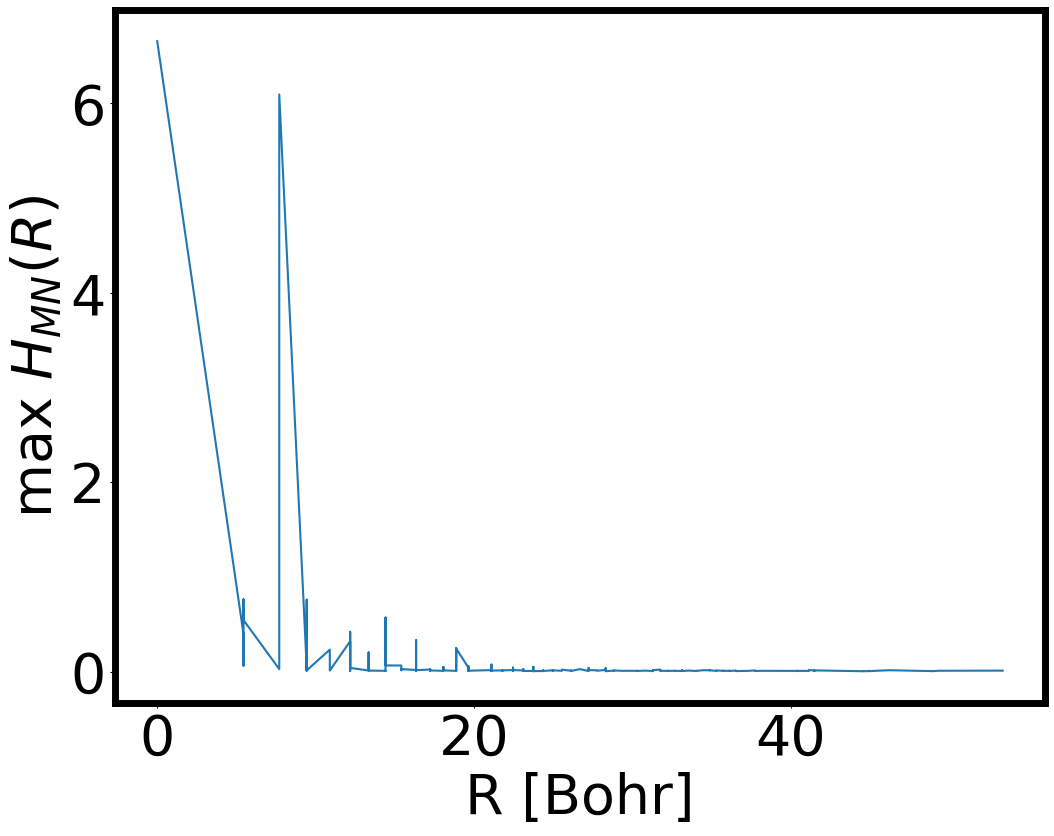

In [19]:
R_dist, max_hr_p=model.decay_R(lat_k.lat, hrk,fermie = 3.0)

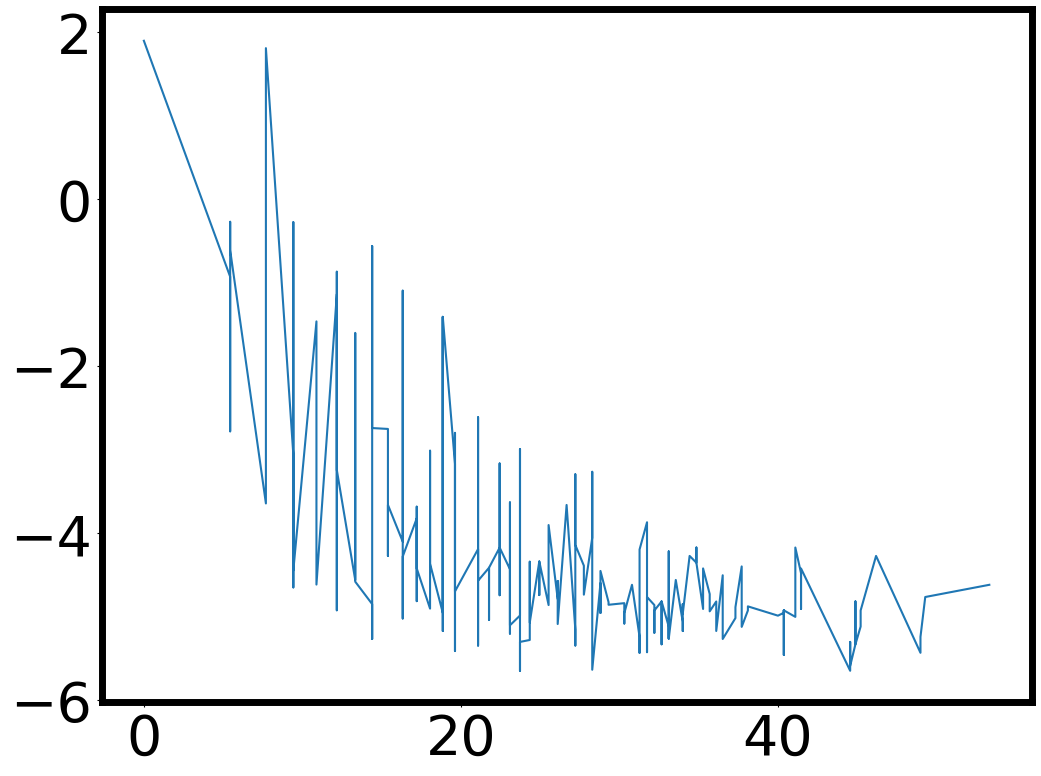

In [20]:
fig,ax = plt.subplots()
ax.plot(R_dist, np.log(max_hr_p))

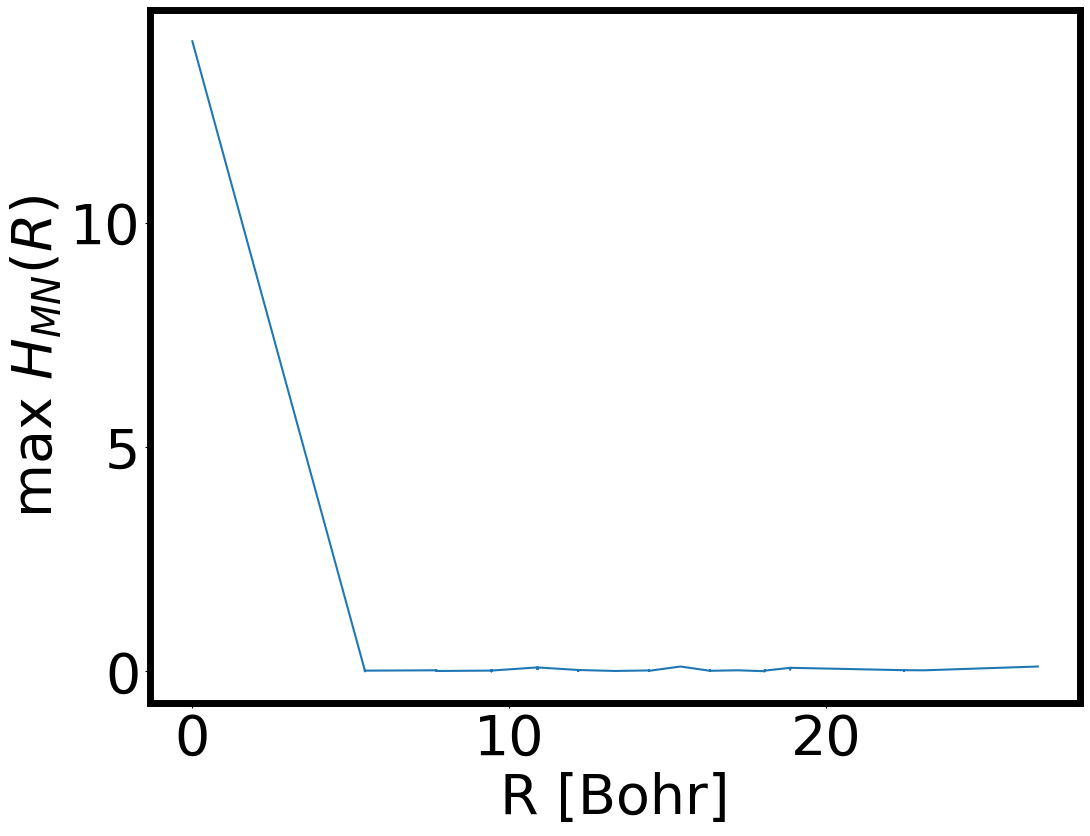

In [21]:
R_dist, max_hr_p=model_exc.decay_R(lat_q.lat, hrqexc,fermie = 3.0)

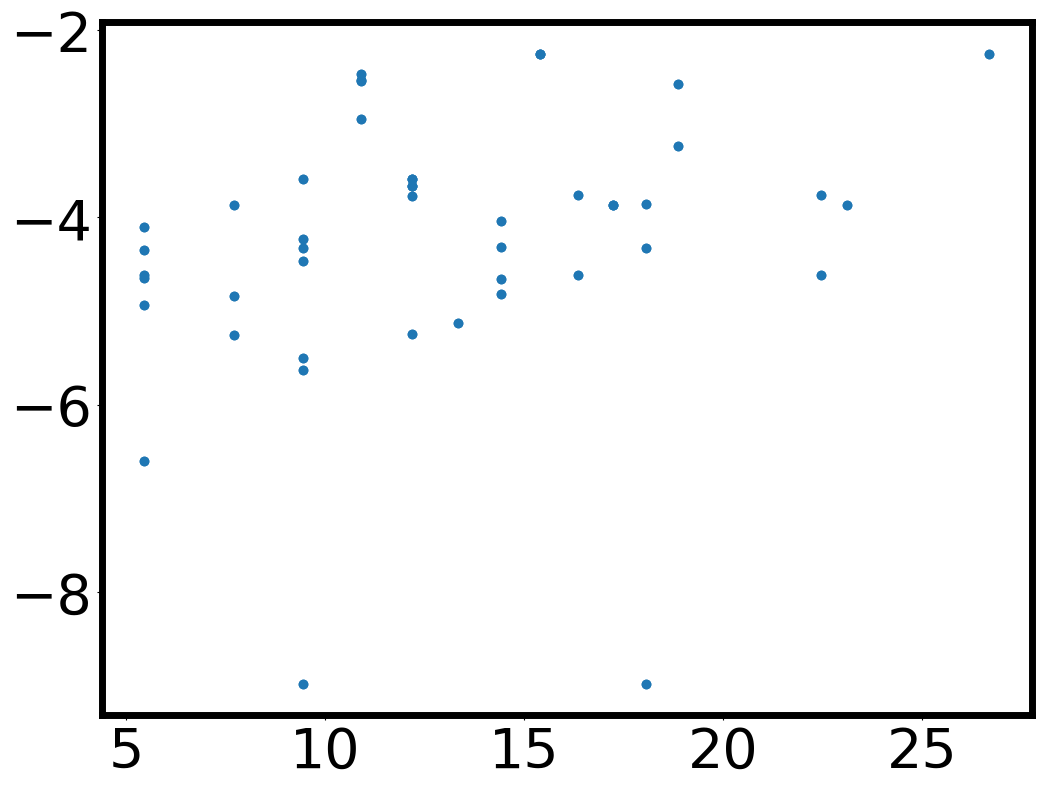

In [24]:
fig,ax = plt.subplots()
ax.scatter(R_dist[1:], np.log(max_hr_p[1:]))

In [ ]:
fig,ax = plt.subplots()
ax.plot(R_dist, np.log(max_hr_p))

In [8]:
fermie = 3.0
model.solve_ham_from_hr(lat_k, hrk, fermie=fermie  )

Diagonalization took 0.009 s


In [27]:
64*4*4

1024

In [28]:
model.T_table

array([[ 0,  0,  4],
       [ 0,  0,  5],
       [ 0,  0,  6],
       ...,
       [63,  3,  5],
       [63,  3,  6],
       [63,  3,  7]])

In [24]:
model.T_table.shape

(1024, 3)

In [84]:
savedb_k.nbandsv

4

In [83]:
512*3*3

4608

In [82]:
bsekernelk.ntransitions/512

9.0

In [69]:
yexck = YamboExcitonDB.from_db_file(lat_k,filename=f'{YAMBO_TUT_PATH}/unshifted-grid/triplets/8x8x8/06_BSE_fullq/ndb.BS_diago_Q1')
bsekernelk = YamboBSEKernelDB.from_db_file(lattice=lat_k, folder=f'{YAMBO_TUT_PATH}/unshifted-grid/triplets/8x8x8/06_BSE_fullq')
yexcq = YamboExcitonDB.from_db_file(lat_k,filename=f'{YAMBO_TUT_PATH}/unshifted-grid/triplets/06_BSE_fullq/ndb.BS_diago_Q1')
bsekernelq = YamboBSEKernelDB.from_db_file(lattice=lat_k, folder=f'{YAMBO_TUT_PATH}/unshifted-grid/triplets/06_BSE_fullq')

# Plots from Yambo run

In [31]:
# data_k = np.loadtxt(f'{WORK_PATH}/database/FixSymm/bse-full/o-bse-full.eps_q1_diago_bse', usecols=[0,1])
# data_q = np.loadtxt(f'{WORK_PATH}/database-q/FixSymm/bse-full/o-bse-full.eps_q1_diago_bse', usecols=[0,1]) 
# data_k_11 = np.loadtxt(f'{WORK_PATH}/database/FixSymm/bse_11/o-bse_11.eps_q1_diago_bse', usecols=[0,1])
# data_q_11 = np.loadtxt(f'{WORK_PATH}/database-q/FixSymm/bse_11/o-bse_11.eps_q1_diago_bse', usecols=[0,1])
data_k_triplets = np.loadtxt(f'{YAMBO_TUT_PATH}/unshifted-grid/triplets/8x8x8/o-06_BSE_fullq.eps_q1_diago_bse_01', usecols=[0,1]) 

(10.0, 15.0)

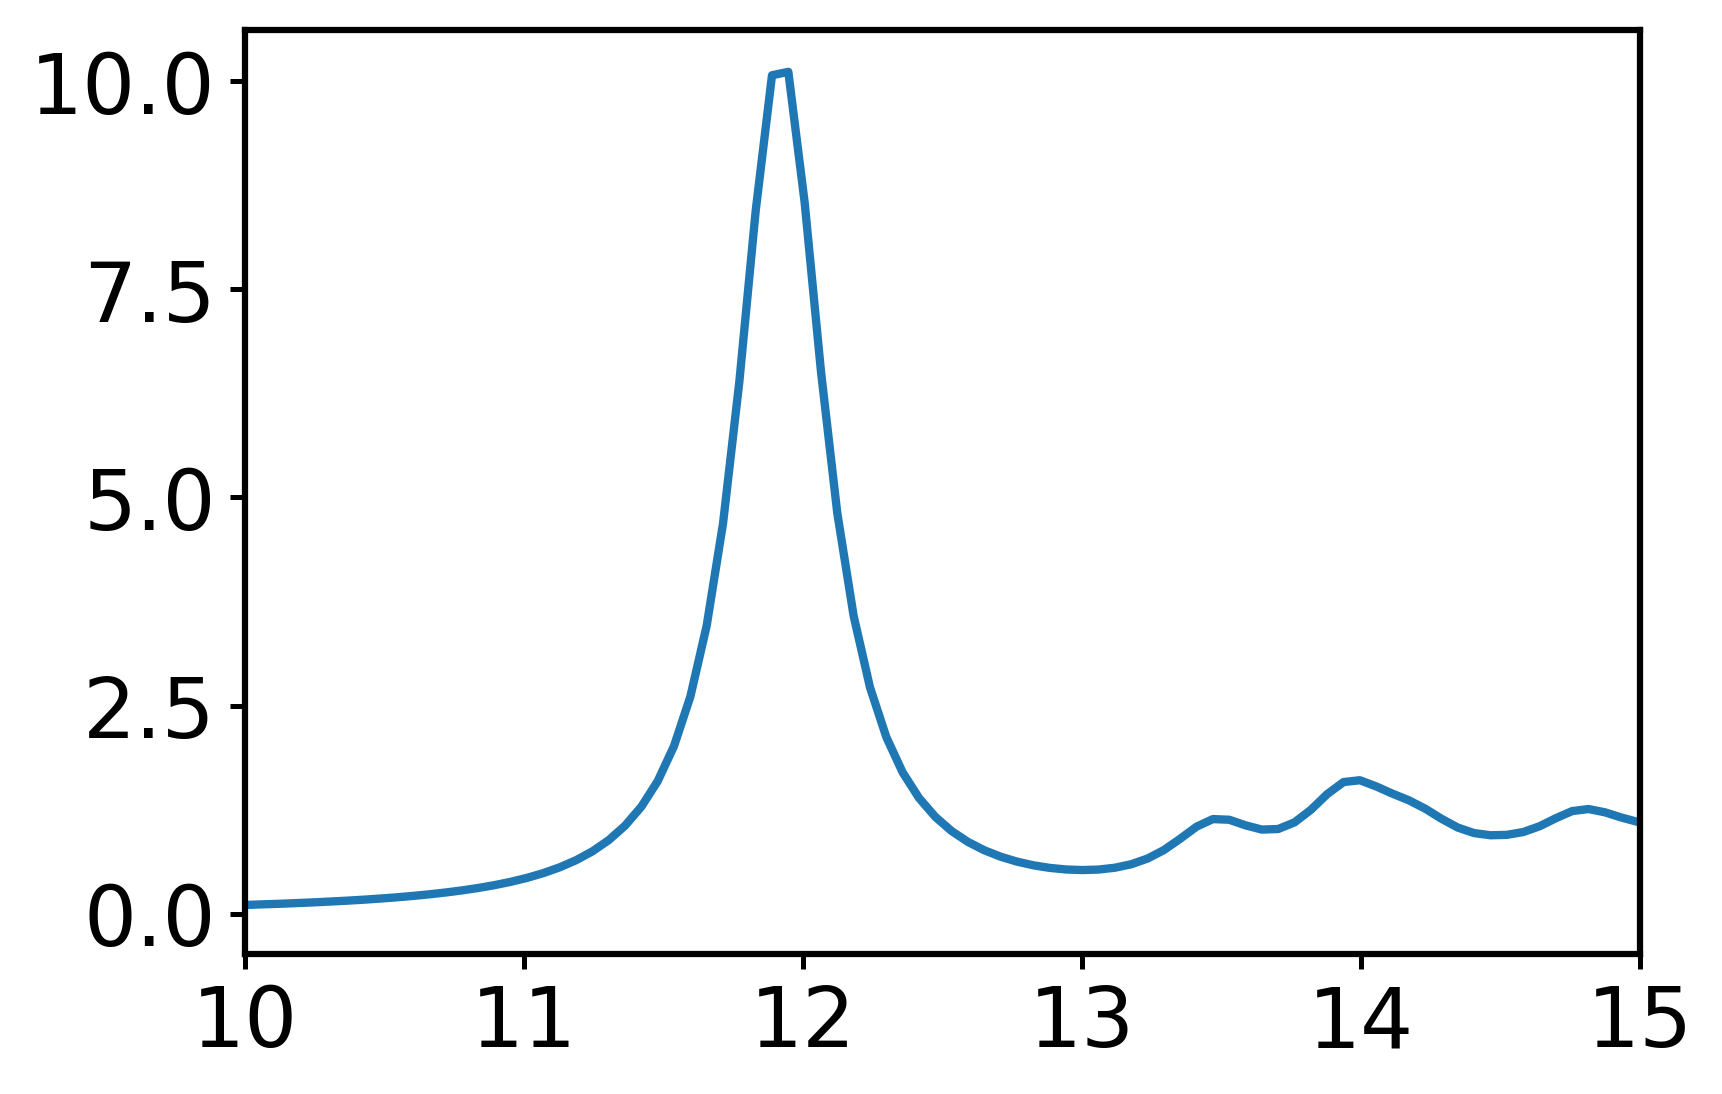

In [33]:
fig,ax = plt.subplots()
ax.plot(data_k_triplets[:,0], data_k_triplets[:,1])
ax.set_xlim(10,15)

(10.0, 20.0)

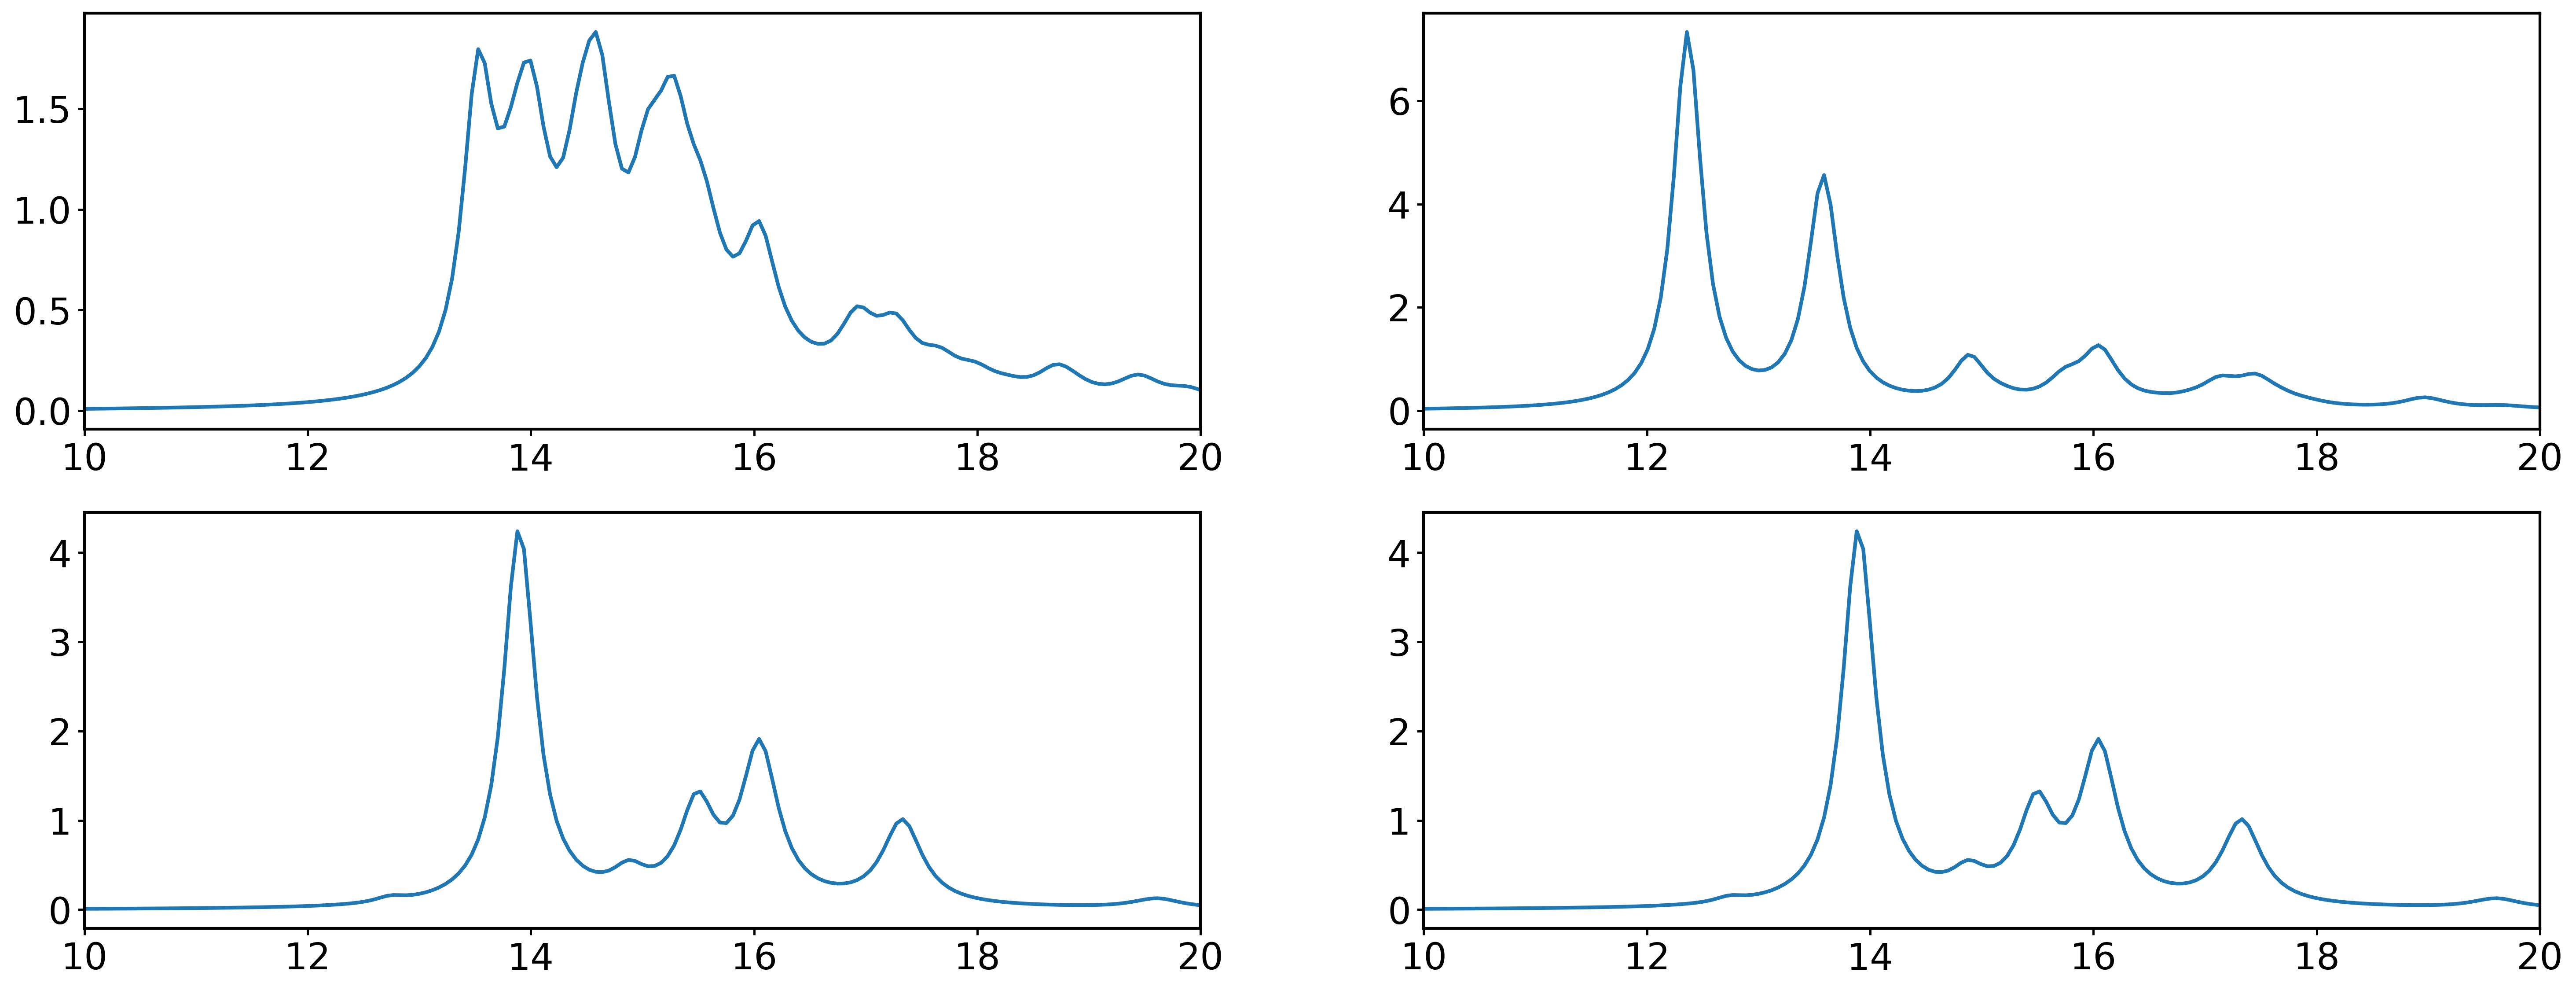

In [38]:
fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(24,9))
axs[0,0].plot(data_k[:,0], data_k[:,1])
axs[0,1].plot(data_q[:,0], data_q[:,1])
axs[1,0].plot(data_k_11[:,0], data_k_11[:,1])
axs[1,1].plot(data_q_11[:,0], data_q_11[:,1])
axs[0,1].set_xlim([10,20])
axs[0,0].set_xlim([10,20])
axs[1,1].set_xlim([10,20])
axs[1,0].set_xlim([10,20])

In [9]:
hlm = model.get_hlm(lat_k.lat, hrk)

In [40]:
np.max(h2p.BSE_table[0,])

4

In [12]:
model.eigv[:,4]

array([ 8.14599248+0.j,  9.40294525+0.j,  9.87027077+0.j,  9.40293643+0.j,
        9.40294342+0.j, 10.44526693+0.j, 12.09125206+0.j, 11.13205249+0.j,
        9.87027555+0.j, 12.09124985+0.j, 13.81646493+0.j, 12.0912512 +0.j,
        9.40293806+0.j, 11.13204835+0.j, 12.09124905+0.j, 10.44526321+0.j,
        9.40294653+0.j, 10.44526592+0.j, 12.09124979+0.j, 11.13205352+0.j,
       10.44526048+0.j,  9.40294214+0.j, 11.13205147+0.j, 12.0912426 +0.j,
       12.09124797+0.j, 11.13205271+0.j, 12.0912465 +0.j, 14.08376958+0.j,
       11.13205466+0.j, 12.09124647+0.j, 14.08377477+0.j, 12.0912465 +0.j,
        9.87027069+0.j, 12.09124776+0.j, 13.81646681+0.j, 12.09124431+0.j,
       12.09124464+0.j, 11.13204905+0.j, 12.09124582+0.j, 14.08376869+0.j,
       13.81645991+0.j, 12.09124311+0.j,  9.87027239+0.j, 12.09124788+0.j,
       12.09124637+0.j, 14.08376998+0.j, 12.09124992+0.j, 11.13204952+0.j,
        9.40293944+0.j, 11.13205659+0.j, 12.09125198+0.j, 10.44527008+0.j,
       11.13205131+0.j, 1

In [17]:
model.eigv.shape

(64, 8)

In [10]:
model.eigv[:,4] = model.eigv[:,4] + 5.8
model.eigv[:,5] = model.eigv[:,5] + 5.8
model.eigv[:,6] = model.eigv[:,6] + 5.8
model.eigv[:,7] = model.eigv[:,7] + 5.8


In [31]:
model.eigv[:,7]

array([28.51783633+0.j, 25.25684262+0.j, 25.25684123+0.j, 25.25683922+0.j,
       25.25684742+0.j, 25.25683935+0.j, 25.25684734+0.j, 25.25684017+0.j,
       25.25683694+0.j, 23.6492547 +0.j, 23.64925321+0.j, 23.64925905+0.j,
       23.64926063+0.j, 25.28960649+0.j, 25.28960493+0.j, 25.28960937+0.j,
       25.2896064 +0.j, 25.28960669+0.j, 25.28960534+0.j, 24.29888039+0.j,
       24.29888657+0.j, 24.2988782 +0.j, 24.29888416+0.j, 24.29888322+0.j,
       24.29888241+0.j, 24.29887614+0.j, 24.29888441+0.j, 24.29887825+0.j,
       24.2988829 +0.j, 24.2988781 +0.j, 24.29887765+0.j, 24.29887953+0.j,
       24.29887329+0.j, 24.29887679+0.j, 24.29888248+0.j, 24.29887952+0.j,
       24.29887975+0.j, 24.29888407+0.j, 24.29888638+0.j, 24.2988803 +0.j,
       24.29887892+0.j, 24.29887783+0.j, 24.29888042+0.j, 24.18986413+0.j,
       24.18985662+0.j, 24.18986406+0.j, 24.18987086+0.j, 24.18986262+0.j,
       24.18986263+0.j, 24.18986725+0.j, 24.18986502+0.j, 24.18986354+0.j,
       24.18986665+0.j, 2

In [42]:
qmpgrid = tb_Monkhorst_Pack(lat.lat,nkpt=[4,4,4], trs=False)

NameError: name 'lat' is not defined

In [43]:
cpot = CoulombPotentials(v0=0.03,ngrid=[4,4,4], lattice=lat, ediel=[1.0,10.0,1.0])

NameError: name 'lat' is not defined

In [22]:
bsekernelq.kernel.shape

(192, 192)

In [43]:
h2p.nv

4

In [42]:
h2p.BSE_table[0]

array([0, 3, 4])

In [28]:
yexc_atq =  YamboExcitonDB.from_db_file(lat_k, filename=f'{YAMBO_TUT_PATH}/unshifted-grid/triplets/1-1bands/06_BSE_fullq//ndb.BS_diago_Q8')

In [29]:
yexc_atq.eigenvalues

masked_array(data=[13.12682519+0.j, 13.95015432+0.j, 14.00490725+0.j,
                   14.1268826 +0.j, 14.38268626+0.j, 14.45542042+0.j,
                   14.45884113+0.j, 14.47935641+0.j, 14.5289809 +0.j,
                   14.59724992+0.j, 14.6398251 +0.j, 14.64146954+0.j,
                   14.64719316+0.j, 15.139704  +0.j, 15.1706037 +0.j,
                   15.18190852+0.j, 15.18941873+0.j, 15.71373528+0.j,
                   15.73868023+0.j, 15.77042142+0.j, 15.78172782+0.j,
                   15.81327462+0.j, 15.85120267+0.j, 16.00031284+0.j,
                   16.05580473+0.j, 16.08163412+0.j, 16.10764793+0.j,
                   16.27776727+0.j, 16.35427996+0.j, 16.36471734+0.j,
                   16.37012823+0.j, 16.49437066+0.j, 16.52229713+0.j,
                   16.56414824+0.j, 16.60040149+0.j, 16.6253433 +0.j,
                   16.6278698 +0.j, 16.66455167+0.j, 16.6740725 +0.j,
                   16.92260039+0.j, 16.95302896+0.j, 17.02737975+0.j,
                   1

In [70]:
kpoints_indexes[63]

7

In [11]:
h2p = H2P(model.nk, model.nb, model.nc, model.nv, model.eigv, model.eigvec, 1,1,
           model.T_table, savedb_k, lat_k, nnkp_kgrid, qmpgrid=nnkp_qgrid,
          cpot=None,kernel_path =f'{YAMBO_TUT_PATH}/unshifted-grid/triplets/1-1bands/06_BSE_fullq/',
          excitons_path = f'{YAMBO_TUT_PATH}/unshifted-grid/triplets/1-1bands/06_BSE_fullq/',TD=False, method='kernel')


 Building H2P from model YamboKernelDB

8 kpoints expanded to 64
Hamiltonian matrix construction completed in 74.52 seconds.


In [66]:
full_kpoints, kpoints_indexes, symmetry_indexes = h2p.savedb.expand_kpts()

In [38]:
h2p.dimbse

64

In [31]:
np.sum(np.sum(h2p.h2peigvec[0,:,:]))

(-2.6598731378119056+0.6468282958750482j)

In [36]:
np.sum(yexc_atq.eigenvectors)

(-7.387523828252015+2.1327541582000027j)

In [17]:
yexc_atq.eigenvalues

masked_array(data=[12.44903226+0.j, 13.59140328+0.j, 13.60149344+0.j,
                   13.71913855+0.j, 13.96039573+0.j, 13.99688535+0.j,
                   14.00640992+0.j, 14.02216547+0.j, 14.07920375+0.j,
                   14.46140603+0.j, 14.53486921+0.j, 14.54165711+0.j,
                   14.57196589+0.j, 15.23612848+0.j, 15.27795502+0.j,
                   15.28347502+0.j, 15.3672966 +0.j, 15.38239429+0.j,
                   15.446076  +0.j, 15.73957155+0.j, 15.74143118+0.j,
                   15.74991   +0.j, 15.79436004+0.j, 15.80264762+0.j,
                   15.82533066+0.j, 15.83461611+0.j, 15.86148728+0.j,
                   15.8634398 +0.j, 15.86588154+0.j, 15.87714303+0.j,
                   15.87936649+0.j, 16.9525548 +0.j, 16.96036326+0.j,
                   16.98273828+0.j, 17.00046315+0.j, 17.01217191+0.j,
                   17.01774434+0.j, 17.0257978 +0.j, 17.0274821 +0.j,
                   17.03941996+0.j, 17.04245316+0.j, 17.05894309+0.j,
                   1

In [30]:
h2p.h2peigv[-1]

array([11.61484228+0.j, 11.78463195+0.j, 11.80985239+0.j, 12.38839782+0.j,
       12.44127946+0.j, 12.48266525+0.j, 12.51339128+0.j, 12.57069055+0.j,
       12.60500026+0.j, 12.61221988+0.j, 12.62002226+0.j, 12.68699687+0.j,
       12.70950857+0.j, 12.74109757+0.j, 12.7818655 +0.j, 12.7976762 +0.j,
       12.8347807 +0.j, 12.9192038 +0.j, 12.92922271+0.j, 12.93241801+0.j,
       12.955526  +0.j, 12.96933548+0.j, 12.99085528+0.j, 12.99581248+0.j,
       12.99593409+0.j, 13.00142244+0.j, 13.0094007 +0.j, 13.02677538+0.j,
       13.0590422 +0.j, 13.06519939+0.j, 13.08677409+0.j, 13.14766909+0.j,
       13.15665458+0.j, 13.16634077+0.j, 13.19497701+0.j, 13.21471005+0.j,
       13.23175038+0.j, 13.26486827+0.j, 13.27680044+0.j, 13.30757546+0.j,
       13.31677438+0.j, 13.3197459 +0.j, 13.32241634+0.j, 13.32536271+0.j,
       13.32816172+0.j, 13.3340604 +0.j, 13.33499539+0.j, 13.35804895+0.j,
       13.36012393+0.j, 13.36706873+0.j, 13.36790652+0.j, 13.3783391 +0.j,
       13.3927696 +0.j, 1

In [12]:
h2p.solve_H2P()


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 0


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 1


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 2


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 3


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 4


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 5


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 6


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 7


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 8


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 9


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 10


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 11


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 12


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 13


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 14


Diag

In [43]:
yexc_atq.eigenvalues

masked_array(data=[12.44903226+0.j, 13.59140328+0.j, 13.60149344+0.j,
                   13.71913855+0.j, 13.96039573+0.j, 13.99688535+0.j,
                   14.00640992+0.j, 14.02216547+0.j, 14.07920375+0.j,
                   14.46140603+0.j, 14.53486921+0.j, 14.54165711+0.j,
                   14.57196589+0.j, 15.23612848+0.j, 15.27795502+0.j,
                   15.28347502+0.j, 15.3672966 +0.j, 15.38239429+0.j,
                   15.446076  +0.j, 15.73957155+0.j, 15.74143118+0.j,
                   15.74991   +0.j, 15.79436004+0.j, 15.80264762+0.j,
                   15.82533066+0.j, 15.83461611+0.j, 15.86148728+0.j,
                   15.8634398 +0.j, 15.86588154+0.j, 15.87714303+0.j,
                   15.87936649+0.j, 16.9525548 +0.j, 16.96036326+0.j,
                   16.98273828+0.j, 17.00046315+0.j, 17.01217191+0.j,
                   17.01774434+0.j, 17.0257978 +0.j, 17.0274821 +0.j,
                   17.03941996+0.j, 17.04245316+0.j, 17.05894309+0.j,
                   1

In [40]:
h2p.h2peigv[0]

array([15.82977276+0.j, 17.1153341 +0.j, 17.12747777+0.j, 17.13081132+0.j,
       17.17132166+0.j, 17.18132003+0.j, 17.29588416+0.j, 17.32054101+0.j,
       17.35182596+0.j, 17.7989061 +0.j, 17.80045859+0.j, 17.80654706+0.j,
       17.83971245+0.j, 18.59248565+0.j, 18.60827948+0.j, 18.6376327 +0.j,
       18.64933871+0.j, 18.68999864+0.j, 18.71197701+0.j, 18.98250152+0.j,
       19.04096714+0.j, 19.04731764+0.j, 19.04772701+0.j, 19.07797912+0.j,
       19.08670902+0.j, 19.10224579+0.j, 19.15857404+0.j, 19.16688473+0.j,
       19.20486034+0.j, 19.21772563+0.j, 19.23866917+0.j, 20.29954069+0.j,
       20.3105905 +0.j, 20.31381065+0.j, 20.31514955+0.j, 20.3567661 +0.j,
       20.3568644 +0.j, 20.35734951+0.j, 20.35864577+0.j, 20.36076385+0.j,
       20.45764024+0.j, 20.46665934+0.j, 20.47532875+0.j, 20.48684631+0.j,
       20.48854045+0.j, 20.49503422+0.j, 20.52162486+0.j, 20.52965282+0.j,
       20.53429581+0.j, 20.5543223 +0.j, 20.55725844+0.j, 20.59060573+0.j,
       20.87853498+0.j, 2

In [44]:
h2p.write_exc_overlap(seedname='LiF_exc',trange=np.arange(0,4), tprange=np.arange(0,4))

KeyboardInterrupt: 

In [27]:
h2p.write_exc_eig(seedname='LiF_exc',trange=np.arange(0,4))
h2p.write_exc_nnkp(seedname='LiF_exc',trange=np.arange(0,4))
h2p.write_exc_amn(seedname='LiF_exc',trange=np.arange(0,4), tprange=np.arange(0,4))

In [19]:
h2p.h2peigv_vck[0,0,0]

array([1.73706989+0.j, 2.20428702+0.j, 2.21395834+0.j, 2.22080882+0.j,
       2.26141649+0.j, 2.28026028+0.j, 2.28274531+0.j, 2.31636707+0.j,
       2.33737088+0.j, 2.39767297+0.j, 2.49537897+0.j, 2.57346995+0.j,
       2.59354568+0.j, 2.60783119+0.j, 2.64165302+0.j, 2.78847518+0.j,
       2.80911411+0.j, 2.83032863+0.j, 2.84823705+0.j, 2.86577156+0.j,
       2.8746782 +0.j, 2.87822552+0.j, 2.88698709+0.j, 2.89189566+0.j,
       2.89912058+0.j, 2.90330567+0.j, 2.90892775+0.j, 3.08289184+0.j,
       3.13106496+0.j, 3.17150535+0.j, 3.18313103+0.j, 3.18641482+0.j,
       3.19539607+0.j, 3.20415959+0.j, 3.20988592+0.j, 3.28826338+0.j,
       3.37302477+0.j, 3.40372985+0.j, 3.41501504+0.j, 3.41873485+0.j,
       3.42993516+0.j, 3.44725148+0.j, 3.45890465+0.j, 3.46443587+0.j,
       3.47344436+0.j, 3.48283392+0.j, 3.48905486+0.j, 3.49508026+0.j,
       3.49761631+0.j, 3.49917862+0.j, 3.50373721+0.j, 3.50513729+0.j,
       3.51015123+0.j, 3.51712658+0.j, 3.54776797+0.j, 3.56023596+0.j,
      

In [ ]:
h2p.h2peigv_vck[0,0,0,:]

array([12.71696484+0.j, 13.19251626+0.j, 13.42286233+0.j, 13.53545343+0.j,
       13.67445442+0.j, 13.77062034+0.j, 13.83880421+0.j, 13.94680043+0.j,
       14.00477078+0.j, 14.07426198+0.j, 14.12540565+0.j, 14.24080659+0.j,
       14.33299531+0.j, 14.46475997+0.j, 14.54253292+0.j, 14.65611771+0.j,
       14.80131041+0.j, 14.86975219+0.j, 14.92458856+0.j, 14.95116035+0.j,
       14.99361053+0.j, 15.01612239+0.j, 15.05992899+0.j, 15.1059974 +0.j,
       15.81275373+0.j, 15.89501123+0.j, 15.90852561+0.j, 15.96162722+0.j,
       16.07350049+0.j, 16.11709955+0.j, 16.12987197+0.j, 16.26075426+0.j,
       16.31404647+0.j, 16.52671132+0.j, 16.8103033 +0.j, 17.07643748+0.j,
       17.13081261+0.j, 17.14835042+0.j, 17.48543801+0.j, 17.5805809 +0.j,
       17.72197787+0.j, 17.99289792+0.j, 18.02867882+0.j, 18.39098043+0.j,
       18.41282526+0.j, 18.45709933+0.j, 18.51321418+0.j, 18.61106365+0.j,
       18.71352868+0.j, 18.78275212+0.j, 18.82273103+0.j, 18.86727048+0.j,
       18.89688034+0.j, 1

In [ ]:
time = np.linspace(-20, 20, 10000)
Et = []
for it, t in enumerate(time):
    Et.append(Efield.E_t(t)[0])
plt.figure(figsize=(10, 6))
plt.plot(time, Et)
plt.title('Electric Field of a Quasi-Monochromatic Pulsed Laser (Atomic Units)')
plt.xlabel('Time (fs)')
plt.ylabel('Electric Field (a.u.)')
plt.grid(True)
plt.show()

NameError: name 'Efield' is not defined

In [ ]:
np.max(Et)

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
realtime = RealTime(h2p, t0=0.0, h=0.01, model=model, E=Efield,  eta = 0.01)

NameError: name 'Efield' is not defined

In [ ]:
realtime.rho_nmk[2,2,2]

NameError: name 'realtime' is not defined

In [ ]:
t, rho_nmk_t=realtime.solve(20)

NameError: name 'realtime' is not defined

In [ ]:
rho_nmk_t.shape

NameError: name 'rho_nmk_t' is not defined

In [ ]:
realtime.e_nmk[3,2,:]*HA2EV

NameError: name 'realtime' is not defined

In [ ]:
realtime.e_nmk[2,3,:]*HA2EV

NameError: name 'realtime' is not defined

In [ ]:
np.dot([1.0,1.0,0.0],0)

array([0., 0., 0.])

NameError: name 'rho_nmk_t' is not defined

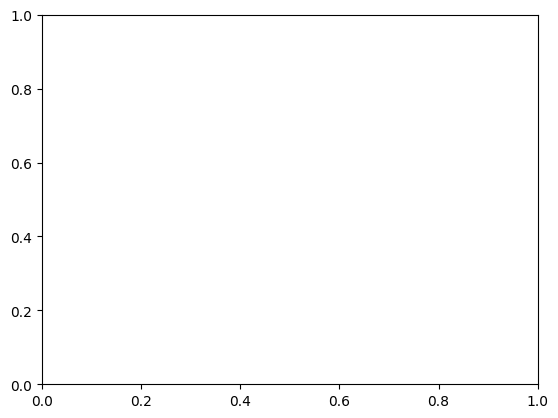

In [ ]:
fig,ax = plt.subplots()
ax.plot(t, rho_nmk_t[2,3,0])

In [ ]:
realtime.rho_nmk.shape

NameError: name 'realtime' is not defined

NameError: name 'rho_nmk_t' is not defined

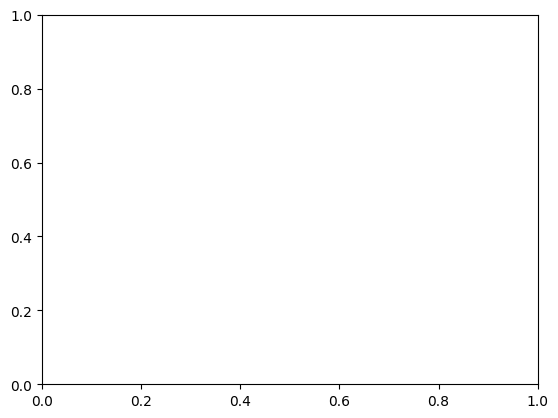

In [ ]:
fig,ax = plt.subplots()
ax.plot(t,np.real(rho_nmk_t*lat.lat_vol))

In [ ]:
def drho_dt (t,y):
    return -1j*(1-0.1j)*y

In [ ]:
sol = scipy.integrate.solve_ivp(drho_dt, [0,1000],[1])

NameError: name 'drho_dt' is not defined

NameError: name 'sol' is not defined

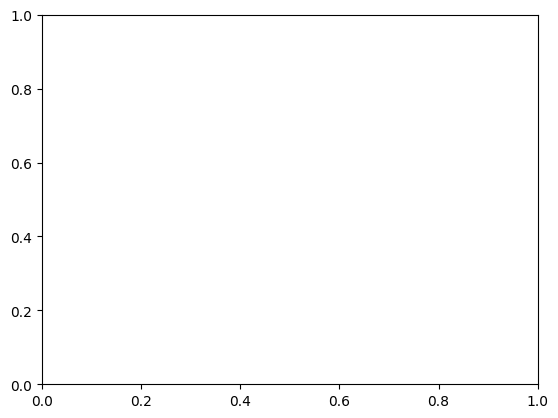

In [ ]:
fig,ax = plt.subplots()
ax.plot(sol.t, sol.y[0])

In [28]:
w, eps = h2p.get_eps(model.hlm, emin=7.5, emax=25, estep= 0.01, eta =0.2)#, dir =[1,0,0])

Excitonic Direct Ground state:  (12.449385310606823+0j)  [eV]


In [35]:
tmp = np.einsum('tij, i ->tj',h2p.F_kcv,[1,0,0])

In [37]:
np.max(tmp-h2p.F_kcv[:,0,:])

0j

(7.0, 20.0)

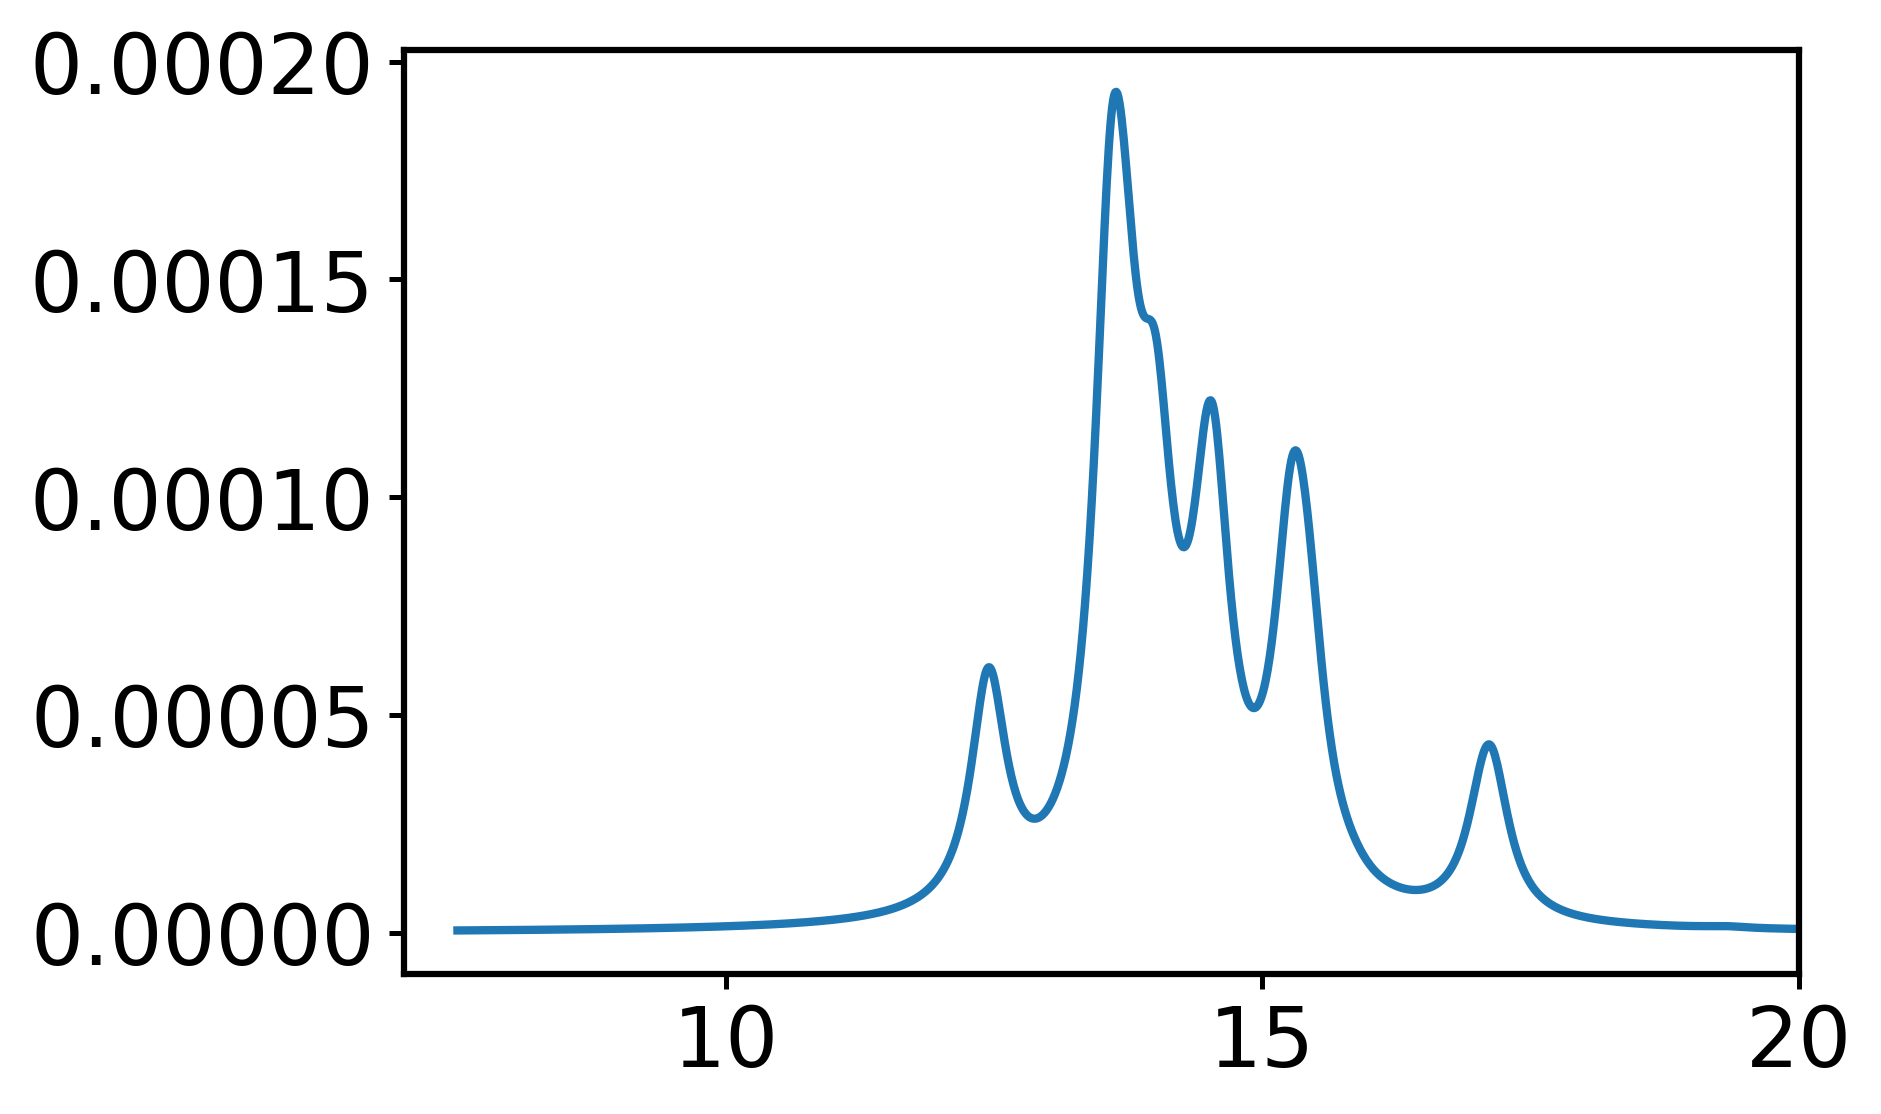

In [29]:
# plot for bse_31 
fig,ax=plt.subplots()
ax.plot(w,np.imag(eps[:,0,0]))
ax.set_xlim(7,20)
#ax.plot(w,np.imag(eps[:,1,1]+eps[:,2,2]+eps[:,0,0]))

NameError: name 'data_k_11' is not defined

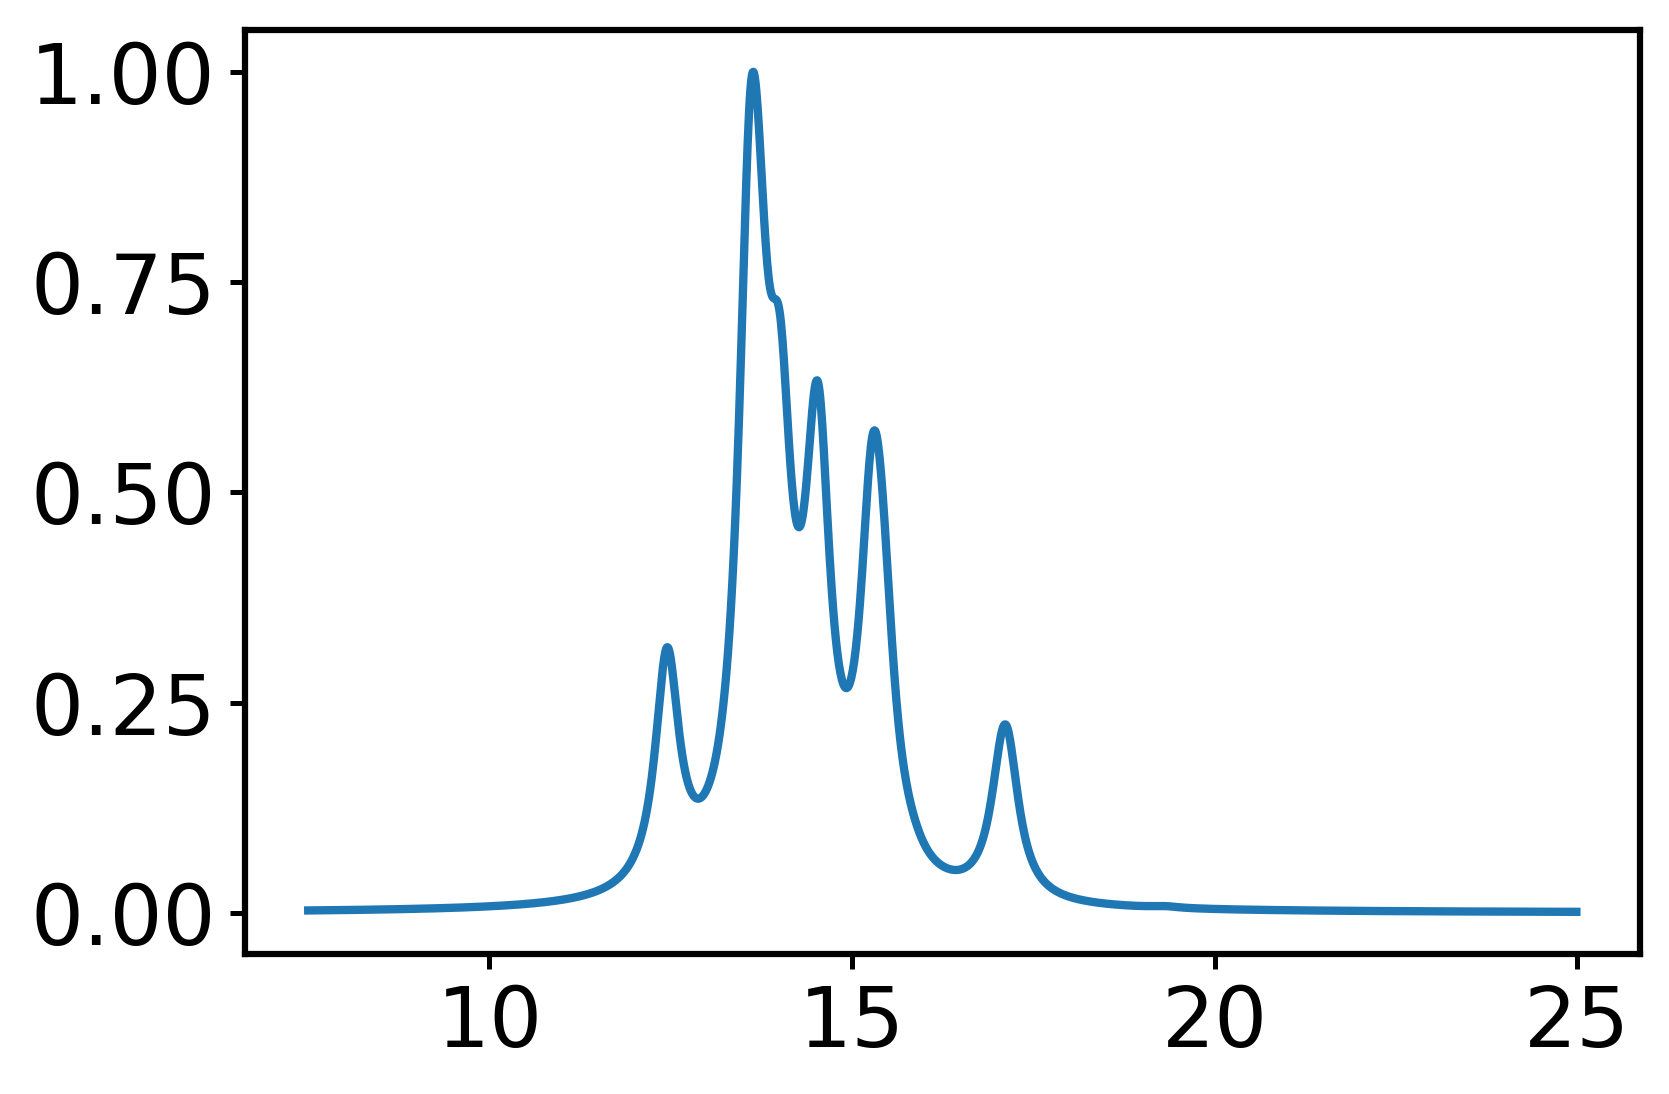

In [30]:
# plot for bse_11 
fig,ax=plt.subplots()
ax.plot(w,np.imag(eps[:,0,0])/np.max(np.imag(eps[:,0,0])), label='tbwannier')
ax.plot(data_k_11[:,0], data_k_11[:,1]/np.max(data_k_11[:,1]),label='Yambo')
ax.legend()
#ax.plot(w,np.imag(eps[:,1,1]+eps[:,2,2]+eps[:,0,0]))

In [ ]:
h2p.h2peigv_vck[0]

array([[[12.85310153+0.j, 13.4421061 +0.j, 13.46857426+0.j,
         13.88611689+0.j, 14.31039994+0.j, 14.84546984+0.j,
         14.84947655+0.j, 14.86482959+0.j, 14.89258982+0.j,
         15.44786255+0.j, 15.4915277 +0.j, 15.51375029+0.j,
         15.59494882+0.j, 15.75014152+0.j, 15.82516607+0.j,
         15.8863299 +0.j, 15.89096575+0.j, 15.97024471+0.j,
         16.00778936+0.j, 16.25363953+0.j, 16.59873257+0.j,
         16.61144971+0.j, 16.62865112+0.j, 16.69475306+0.j,
         16.69882182+0.j, 16.74025783+0.j, 17.48304795+0.j,
         17.61483333+0.j, 17.63562076+0.j, 17.689017  +0.j,
         17.70273034+0.j, 17.87094234+0.j, 17.88410262+0.j,
         17.97688328+0.j, 17.98954161+0.j, 18.19356021+0.j,
         18.58303571+0.j, 18.73773143+0.j, 18.84028863+0.j,
         18.84822892+0.j, 18.88630661+0.j, 18.91324171+0.j,
         18.92564919+0.j, 19.01040284+0.j, 19.22165842+0.j,
         19.26460925+0.j, 19.28705461+0.j, 19.38934308+0.j,
         19.7293635 +0.j, 19.73121187+0.

In [ ]:
bsekernel.get_kernel_exciton_basis(yexc)[:]*ha2ev

array([-2.5403816 +0.03657657j, -2.46197788+0.08394163j,
       -2.5773733 +0.14987937j, -2.03775735+0.08253804j,
       -2.10945018-0.04995961j, -2.00027117+0.01547679j,
       -1.90565895+0.01535933j, -1.90985077+0.00622039j,
       -1.97637347+0.02658338j, -1.86150274-0.00060878j,
       -1.88040221+0.020218j  , -1.82986372+0.02025516j,
       -1.90217827+0.03079503j, -1.89294923+0.02844291j,
       -1.78664175+0.01744669j, -1.73046786+0.01407508j,
       -1.80468908+0.02564809j, -1.79162164+0.00666555j,
       -1.75714569-0.0099133j , -1.77812226+0.07478249j,
       -1.67192694+0.04870328j, -1.70648917+0.04300302j,
       -1.62394073+0.02989933j, -1.72341042+0.0295256j ,
       -1.72314242+0.03430314j, -1.6270631 +0.02614595j,
       -1.7159552 +0.03039139j, -1.88965563+0.06097989j,
       -1.94304258-0.0044567j , -1.92604963-0.046795j  ,
       -1.93444181+0.0004837j , -1.89119873+0.00195316j,
       -1.9147386 +0.04523101j, -1.74840399+0.00414452j,
       -1.74151683+0.00728925j,

In [ ]:
np.isclose(np.real(bsekernel.get_kernel_exciton_basis(yexc)[:]*ha2ev),-1.7462988376924007)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
bsekernel.get_kernel_value_bands(yexc,bands=[5,6])[0,0]*ha2ev

(-1.7462988376924007+9.621668769541692e-05j)

In [ ]:
realtime.d_knm*ha2ev**3

array([[[[-5.51338879e-01-5.68988501e-16j,
           2.68121599e-01+1.66533220e-16j,
          -1.10692846e-01-1.83446750e-16j],
         [-2.61241999e-01-3.33439707e-01j,
          -4.97627052e-01-2.10678191e-01j,
          -4.68333429e-01+7.20603577e-03j],
         [-7.28019528e-01-5.33250345e-01j,
          -1.68058869e-01-3.03578381e-01j,
          -2.39505804e-01-5.45670833e-01j],
         [-4.48314816e+00+9.96714337e+00j,
          -4.03965547e+00+4.20575956e-01j,
          -4.37841716e+00-9.42997717e+00j]],

        [[-2.61241999e-01+3.33439707e-01j,
          -4.97627052e-01+2.10678191e-01j,
          -4.68333429e-01-7.20603577e-03j],
         [ 2.65531270e-01-4.85721891e-16j,
           3.69630418e-01+6.93888416e-18j,
           2.50786690e-01-1.11022147e-16j],
         [ 2.40474772e-01+5.03333426e-01j,
          -1.31926250e-01+3.77299306e-01j,
          -3.17590525e-01+2.45091343e-01j],
         [-1.50813076e+00-1.87251625e+00j,
          -6.09218111e+00-1.98541704e+00j,
  

In [ ]:
h2p.write_exc_eig(seedname='LiF_exc')

In [ ]:
h2p.write_exc_nnkp(seedname='LiF_exc')

In [ ]:
h2p.write_exc_amn(seedname='LiF_exc')

In [ ]:
for i in range(0,nnkp_qgrid.nkpoints):
    print(cpot.vcoul(kpt1=nnkp_qgrid.car_kpoints[i], kpt2=0))

0.8163415019999999
0.004684926650163321
0.004684926650163321
0.00351369498762249
0.004684926650163321
0.00351369498762249
0.00351369498762249
0.004684926650163321


In [ ]:
np.max(h2p.h2peigvec)

In [ ]:
np.real(h2p.h2peigv+4.7)

In [ ]:
cpot.ngrid

In [ ]:
def vcoul(self,modk):
    vbz = 1.0 / (8 * self.dir_vol)
    ed = self.ediel[1]  # The dielectric constant is set to 1.0
    vcoul = vbz * (2*self.pi / ed) * (1.0 / (modk ** 2))
    print(vcoul*ha2ev, vbz)

In [ ]:
vcoul(cpot, 0.322197904305617)

In [ ]:
0.804086011476590/0.018013368671406575

In [ ]:
9.22606*64*1e-4

In [ ]:
lat.rlat_vol/bohr2ang

In [ ]:
114.2879/(ang2bohr**3)

In [ ]:
lat.lat[0]

In [ ]:
nnkp_qgrid.car_kpoints

In [ ]:
ang2bohr

In [ ]:
-1.54131724477493/ang2bohr

In [ ]:
def vcoul(self, kpt1, kpt2):
    modk = modvec(kpt1, kpt2)
    modk = 0.8888121396261877
    print(modk)
    vbz = 1.0 / (64 * self.dir_vol)
    ed = self.ediel[1]  # The dielectric constant is set to 1.0
    if modk < self.tolr:
        vcoul = 0.0
    else:
        vcoul = vbz * (2*self.pi / ed) * (1.0 / (modk ** 2))
    print(vcoul*ha2ev)
    return vcoul*ha2ev

for i in range(0, nnkp_kgrid.nkpoints):
    vcoul(self=cpot, kpt1=nnkp_kgrid.k[i], kpt2=[0,0,0])


NameError: name 'nnkp_kgrid' is not defined

In [ ]:
import math

def dydt(t, y):
    return -1j*(12-0.1*1j) * y -1j* math.cos(4*t)


In [ ]:
realtime.e_nmk[2,2,2]

0j

In [ ]:
t = np.linspace(0,100,1000)
sol = scipy.integrate.solve_ivp(dydt, y0 = [1.0],t_span=(0,max(t)), t_eval=t)

In [ ]:
sol.y

array([[1.00000000e+00, 9.90039923e-01, 9.80179049e-01, 9.70416386e-01,
        9.60750956e-01, 9.51181794e-01, 9.41707943e-01, 9.32328455e-01,
        9.23042390e-01, 9.13848817e-01, 9.04746816e-01, 8.95735474e-01,
        8.86813886e-01, 8.77981159e-01, 8.69236406e-01, 8.60578750e-01,
        8.52007323e-01, 8.43521267e-01, 8.35119370e-01, 8.26799268e-01,
        8.18560106e-01, 8.10401223e-01, 8.02321961e-01, 7.94321664e-01,
        7.86399681e-01, 7.78555361e-01, 7.70788057e-01, 7.63097123e-01,
        7.55481919e-01, 7.47941803e-01, 7.40476139e-01, 7.33084291e-01,
        7.25765629e-01, 7.18519523e-01, 7.11345345e-01, 7.04242472e-01,
        6.97210281e-01, 6.90248154e-01, 6.83355473e-01, 6.76531625e-01,
        6.69775999e-01, 6.63087985e-01, 6.56466977e-01, 6.49912371e-01,
        6.43423567e-01, 6.36999965e-01, 6.30640970e-01, 6.24345987e-01,
        6.18114427e-01, 6.11945700e-01, 6.05839222e-01, 5.99794408e-01,
        5.93810678e-01, 5.87887455e-01, 5.82024162e-01, 5.762202

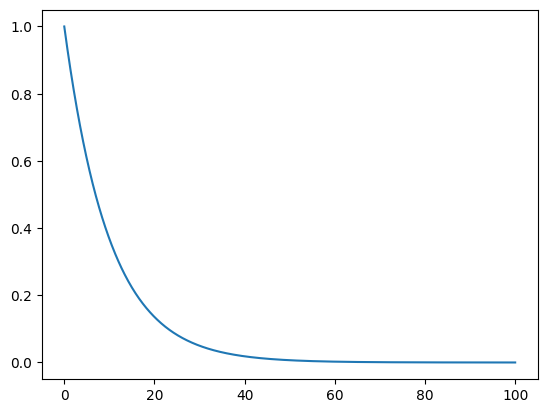

In [ ]:
fig,ax = plt.subplots()
ax.plot(sol.t, sol.y[0])
#ax.set_ylim([-1,3.2])

In [ ]:
import scipy
sol = scipy.integrate.solve_ivp(dydt, [0,6],[3])

ValueError: `y0` must be 1-dimensional.

In [ ]:
sol.y[0]

array([ 3.        ,  2.6347427 ,  1.08228779,  0.18700481,  0.09270282,
        0.26560822,  0.22139805, -0.08912212, -0.19602053,  0.04477115,
        0.22670799, -0.02565571, -0.22158216,  0.0444433 ,  0.22097767,
       -0.0223755 , -0.22339303, -0.13869027])

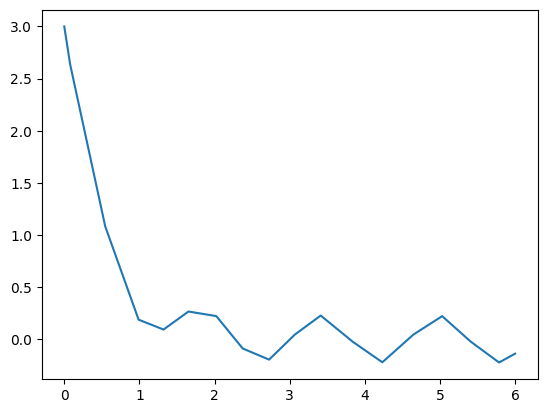

In [ ]:
fig,ax = plt.subplots()
ax.plot(sol.t, sol.y[0])

In [98]:
import numpy as np

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant, J s
eV_to_J = 1.60218e-19  # Conversion factor from eV to J
gamma = ...  # Define the damping term

# Example of monochromatic electric field as a function of time
E0 = ...  # Amplitude of the electric field
omega_light = ...  # Angular frequency of the pump light
phi = ...  # Phase

def E(t):
    return E0 * np.cos(omega_light * t + phi)

# Define the F_nm function
def F_nm(rho, d, delta_epsilon_nm, t):
    # Assuming rho, d are numpy arrays and the sum is over the index p
    sum_term = np.sum(d * rho - rho * d, axis=...)
    return E(t) * sum_term

# Differential equation for rho_nm
def drho_dt(t, rho, d, delta_epsilon_nm):
    F_nm_val = F_nm(rho, d, delta_epsilon_nm, t)
    return (1j / hbar) * (F_nm_val - (delta_epsilon_nm - 1j * gamma) * rho)

# You would then use an ODE solver to solve this equation for rho over time.
# This could be a built-in solver like scipy.integrate.solve_ivp, or a custom
# implementation of the Runge-Kutta method.


# Yambo tutorials

In [102]:
data_02_RPA_no_LF = np.loadtxt(f'{YAMBO_TUT_PATH}/shifted-grid/o-02_RPA_no_LF.eps_q1_inv_rpa_dyson', usecols=(0,1))
data_03_RPA_LF = np.loadtxt(f'{YAMBO_TUT_PATH}/shifted-grid/o-03_RPA_LF.eps_q1_inv_rpa_dyson', usecols=(0,1))
data_03_RPA_LF_QP = np.loadtxt(f'{YAMBO_TUT_PATH}/shifted-grid/o-03_RPA_LF_QP.eps_q1_inv_rpa_dyson', usecols=(0,1))
data_04_alda_g = np.loadtxt(f'{YAMBO_TUT_PATH}/shifted-grid/o-04_alda_g_space.eps_q1_inv_rpa_dyson', usecols=(0,1))
data_06_BSE = np.loadtxt(f'{YAMBO_TUT_PATH}/shifted-grid/o-06_BSE.eps_q1_diago_bse', usecols=(0,1))
data_exp = np.loadtxt(f'{YAMBO_TUT_PATH}/e2_experimental.dat', usecols=(0,1))


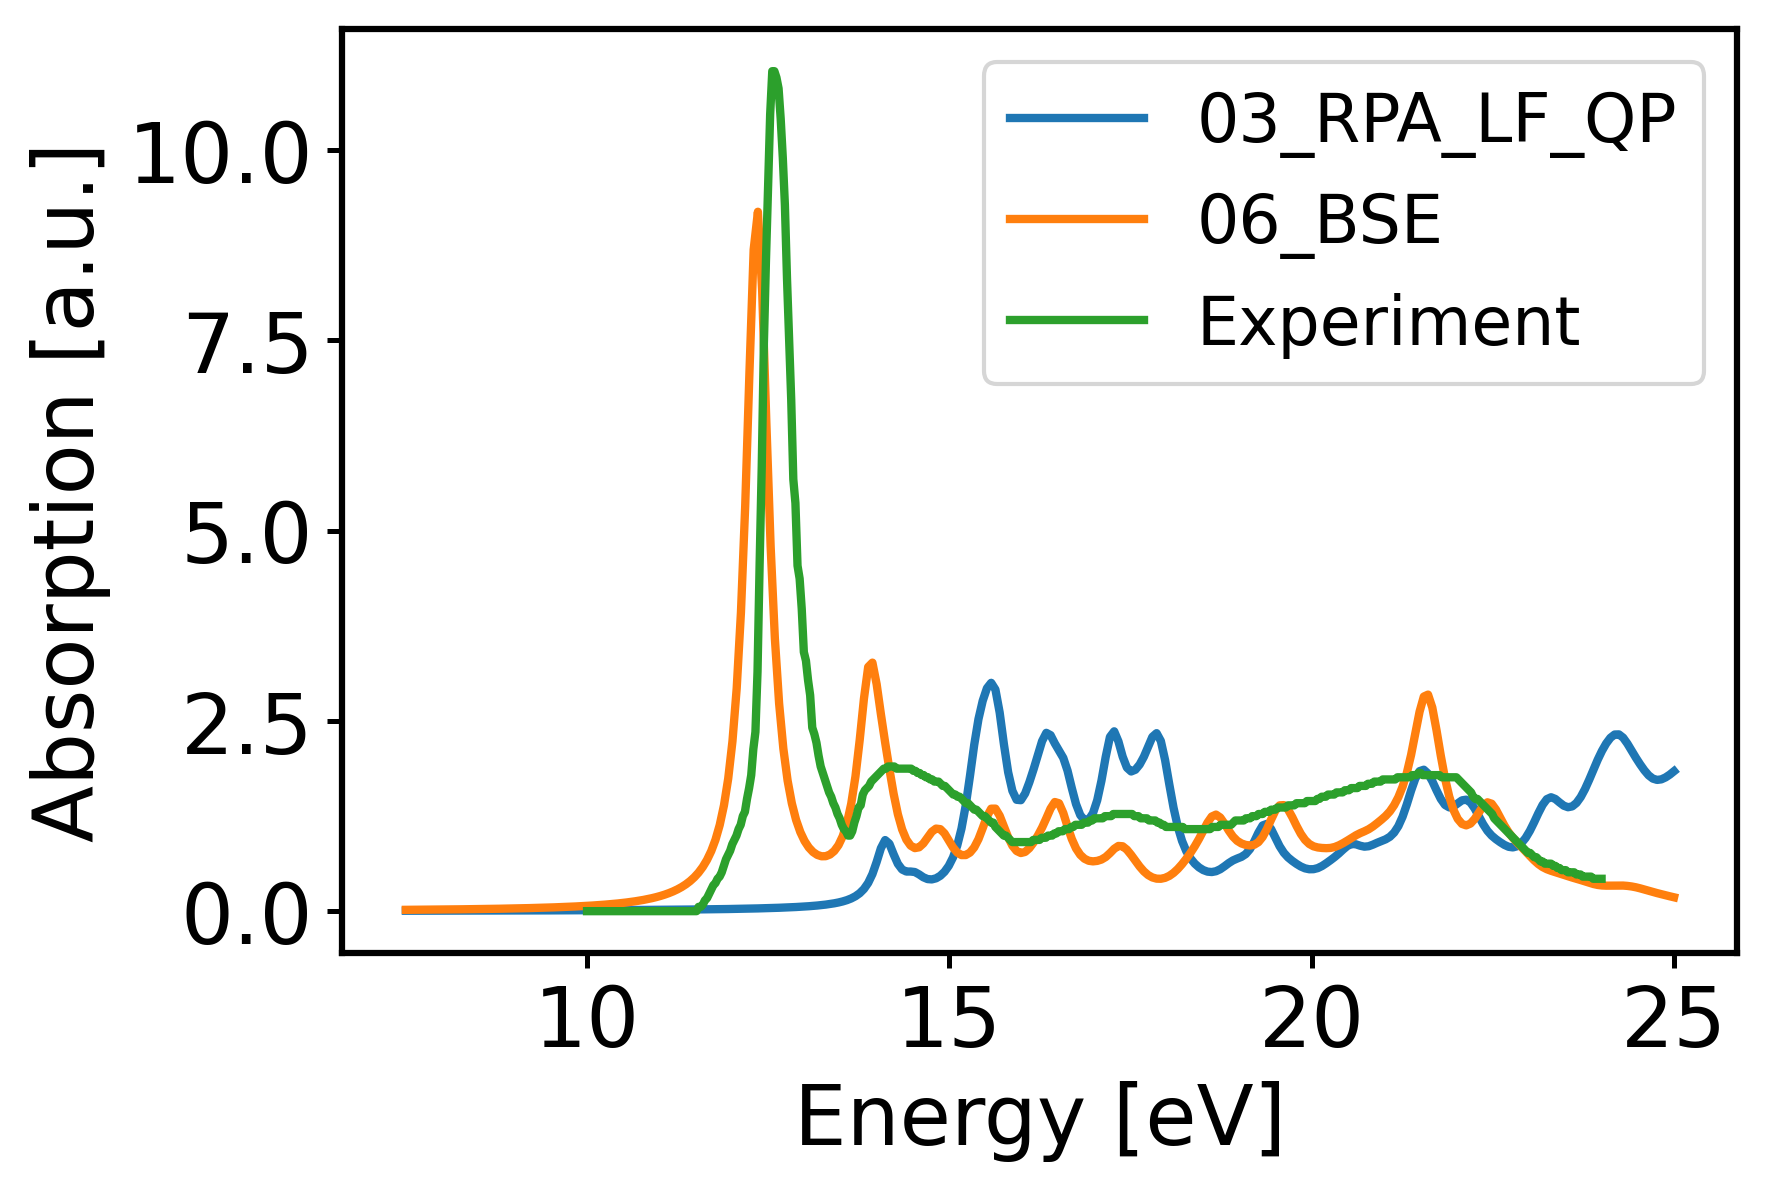

In [98]:
fig,ax =plt.subplots()
#ax.plot(data_02_RPA_no_LF[:,0], data_02_RPA_no_LF[:,1], label='02_RPA_no_LF')
#ax.plot(data_03_RPA_LF[:,0], data_03_RPA_LF[:,1], label='03_RPA_LF')
ax.plot(data_03_RPA_LF_QP[:,0], data_03_RPA_LF_QP[:,1], label='03_RPA_LF_QP')
#ax.plot(data_04_alda_g[:,0], data_04_alda_g[:,1], label='04_alda_g')
ax.plot(data_06_BSE[:,0], data_06_BSE[:,1], label='06_BSE')
ax.plot(data_exp[:,0], data_exp[:,1], label='Experiment')
ax.set_ylabel('Absorption [a.u.]')
ax.set_xlabel('Energy [eV]')
ax.legend()
plt.savefig(f'{YAMBO_TUT_PATH}/shifted-grid/absorption_tut_v3.png', bbox_inches='tight')




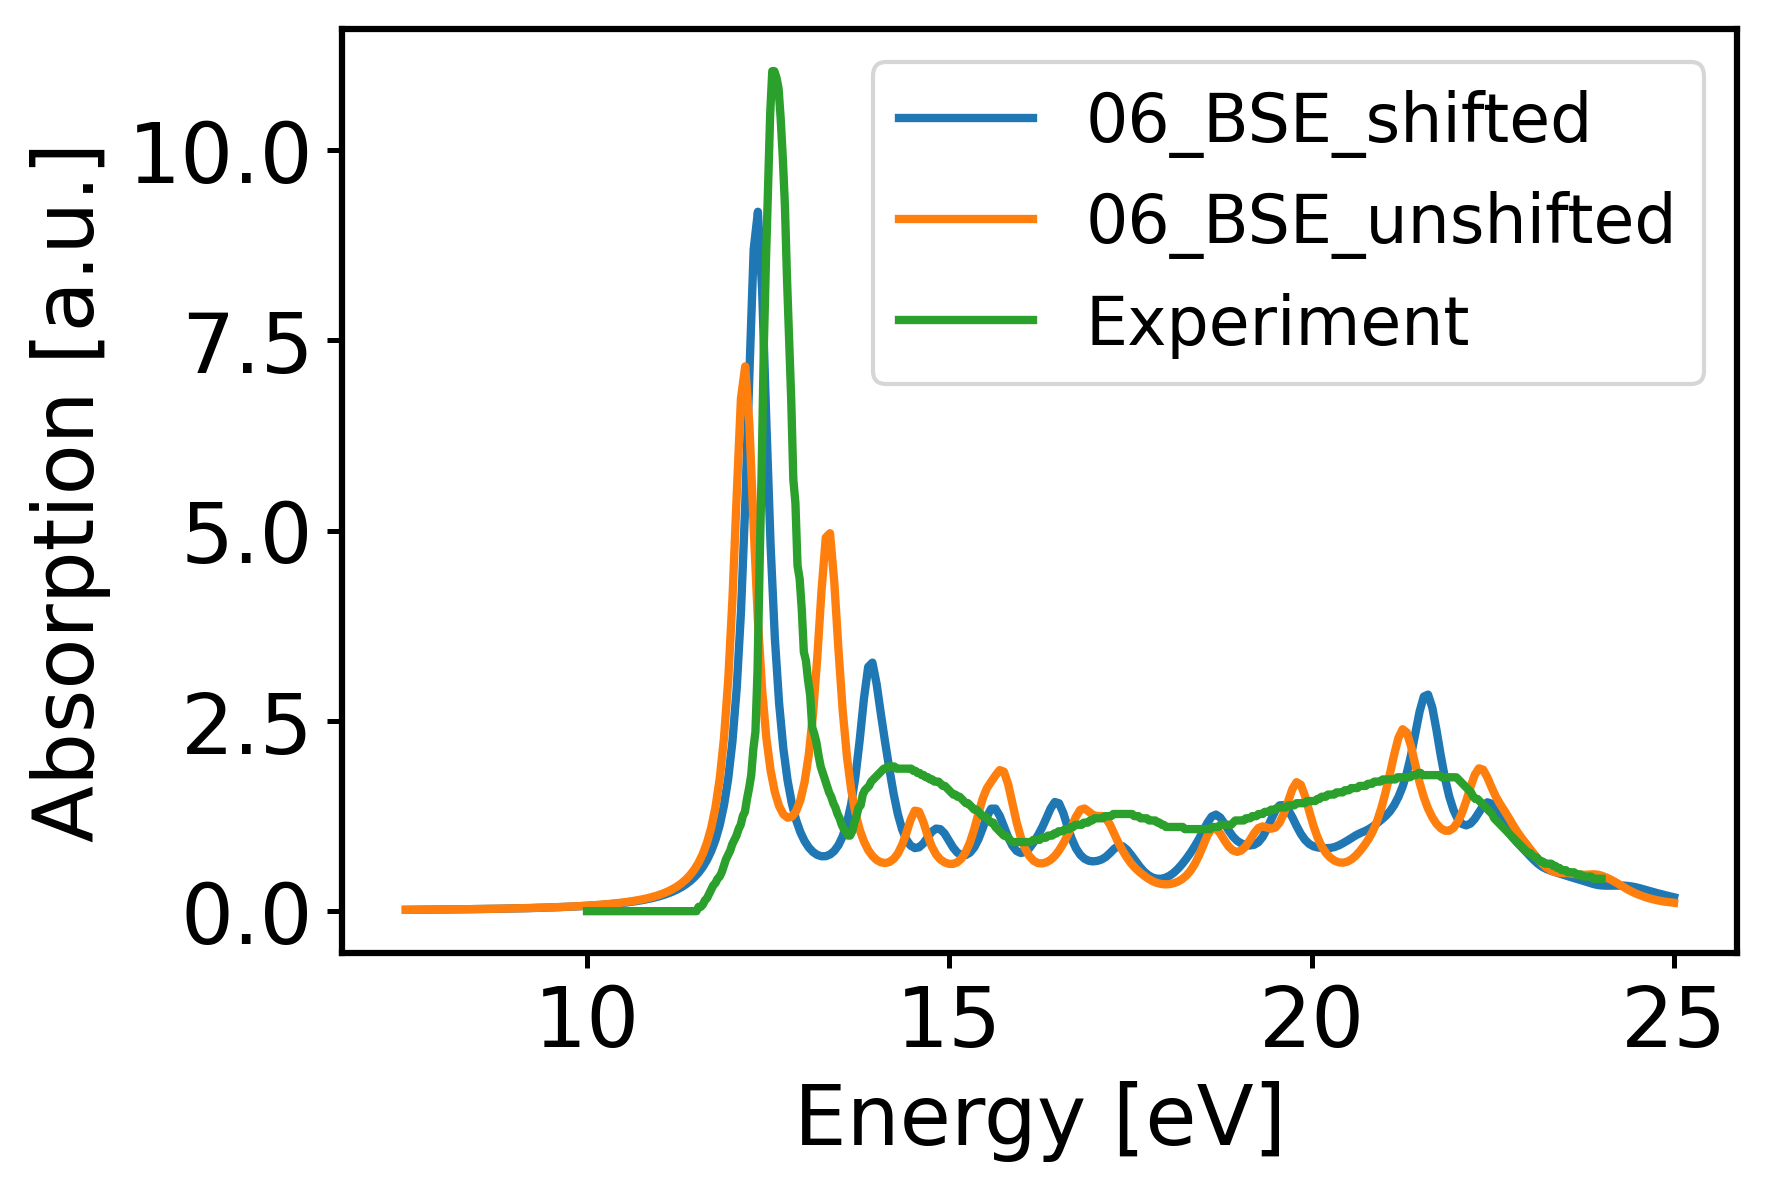

In [100]:
data_06_BSE_shifted = np.loadtxt(f'{YAMBO_TUT_PATH}/shifted-grid/o-06_BSE.eps_q1_diago_bse', usecols=(0,1))
data_06_BSE_unshifted = np.loadtxt(f'{YAMBO_TUT_PATH}/unshifted-grid/o-06_BSE.eps_q1_diago_bse', usecols=(0,1))
fig,ax =plt.subplots()
ax.plot(data_06_BSE_shifted[:,0], data_06_BSE_shifted[:,1], label='06_BSE_shifted')
ax.plot(data_06_BSE_unshifted[:,0], data_06_BSE_unshifted[:,1], label='06_BSE_unshifted')
ax.plot(data_exp[:,0], data_exp[:,1], label='Experiment')
ax.set_ylabel('Absorption [a.u.]')
ax.set_xlabel('Energy [eV]')
ax.legend()
plt.savefig(f'{YAMBO_TUT_PATH}/shifted-grid/absorptionshitvsunshift.png', bbox_inches='tight')



## Exciton band structure

In [109]:
savedb_k = YamboSaveDB.from_db_file(f'{YAMBO_TUT_PATH}/unshifted-grid/SAVE')
lat_k = YamboLatticeDB.from_db_file(f'{YAMBO_TUT_PATH}/unshifted-grid/SAVE/ns.db1')

8 kpoints expanded to 64


In [117]:
# Define path in reduced coordinates using Class Path
npoints = 30
path_kpoints = Path([[[  0.5,  0.5,  0.5],'L'],
              #[[  0.375,  0.375,  0.750],'K'],    
              [[  0.0,  0.0,  0.0],'$\Gamma$'],
              #[[  0.625,  0.250,  0.625],'U'],
              [[  0.5,  0.0,  0.5],'X'],
              [[  0.5,  0.250,  0.750],'W'],
              [[0.5,0.5,  0.5],'L']],[npoints,npoints,npoints,npoints] )
              #[[  0.750,  0.250,  0.5],'W2'],
              
kpoints_red = path_kpoints.get_klist()[:,0:3]
kpoints_car = red_car(kpoints_red, lat_k.rlat)
kdistance = path_kpoints.distances
kpoints = path_kpoints.kpoints

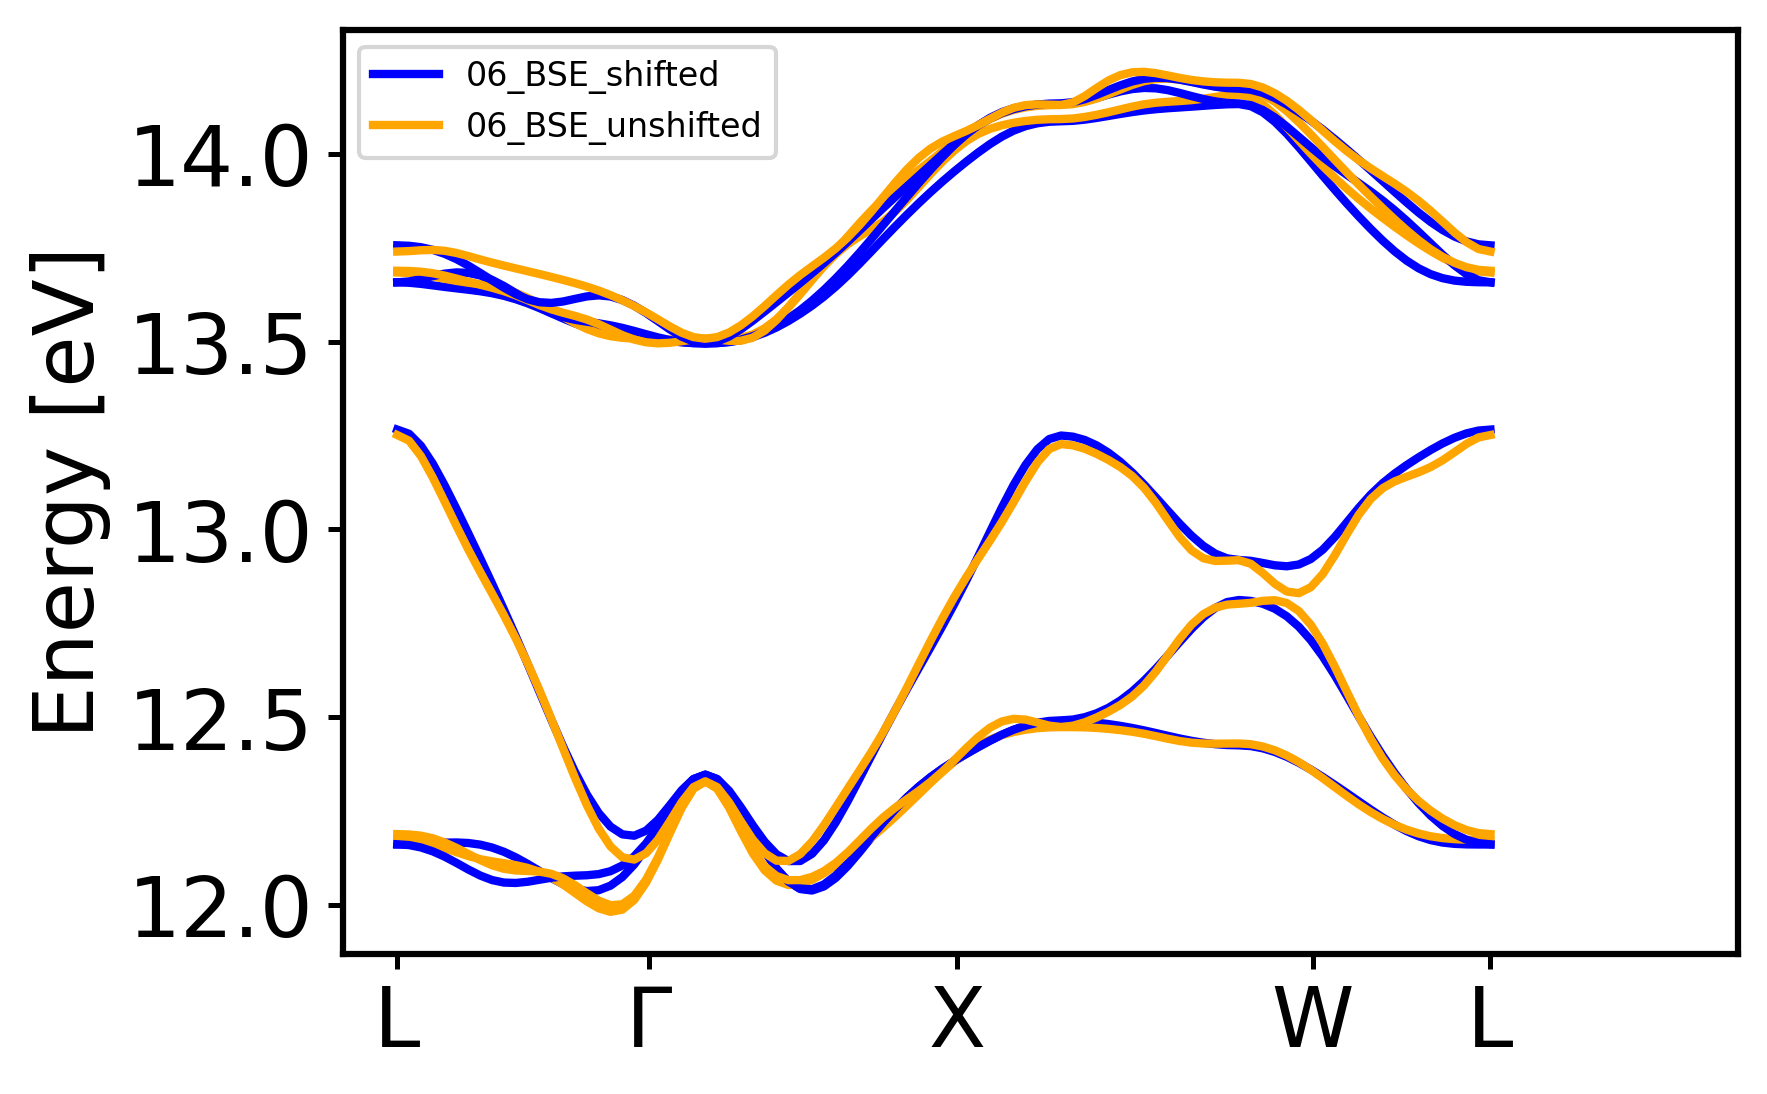

In [132]:
data_excbands_shifted = np.loadtxt(f'{YAMBO_TUT_PATH}/shifted-grid/bse-bands/o-bse-bands.excitons_interpolated', usecols=(0,1,2,3,4,5,6))
data_excbands_unshifted = np.loadtxt(f'{YAMBO_TUT_PATH}/unshifted-grid/8x8x8/bse-bands/o-bse-bands.excitons_interpolated', usecols=(0,1,2,3,4,5,6))
fig,ax =plt.subplots()
ax.plot(data_excbands_shifted[:,0], data_excbands_shifted[:,1], label='06_BSE_shifted', c='blue')
ax.plot(data_excbands_unshifted[:,0], data_excbands_unshifted[:,1], label='06_BSE_unshifted',c='orange')
ax.plot(data_excbands_shifted[:,0], data_excbands_shifted[:,2], c ='blue')
ax.plot(data_excbands_unshifted[:,0], data_excbands_unshifted[:,2], c='orange')
ax.plot(data_excbands_shifted[:,0], data_excbands_shifted[:,3], c ='blue')
ax.plot(data_excbands_unshifted[:,0], data_excbands_unshifted[:,3], c='orange')
ax.plot(data_excbands_shifted[:,0], data_excbands_shifted[:,4], c ='blue')
ax.plot(data_excbands_unshifted[:,0], data_excbands_unshifted[:,4], c='orange')
ax.plot(data_excbands_shifted[:,0], data_excbands_shifted[:,5], c ='blue')
ax.plot(data_excbands_unshifted[:,0], data_excbands_unshifted[:,5], c='orange')
ax.plot(data_excbands_shifted[:,0], data_excbands_shifted[:,6], c ='blue')
ax.plot(data_excbands_unshifted[:,0], data_excbands_unshifted[:,6], c='orange')
ticks, labels =list(zip(*path_kpoints.get_indexes()))
kpoints_dists= np.array(kpoints_dists)
ax.set_xticks(kpoints_dists[np.array(ticks)], labels)
ax.set_xticks(kpoints_dists[np.array(ticks)]/np.max(kpoints_dists[np.array(ticks)])*np.max(data_excbands_unshifted[:,0]), labels)
ax.set_ylabel('Energy [eV]')
#ax.set_xlabel('$q_x$')
ax.legend(loc='upper left', fontsize=8)
plt.savefig(f'{YAMBO_TUT_PATH}/excbands_shifvsunshift.png', bbox_inches='tight')



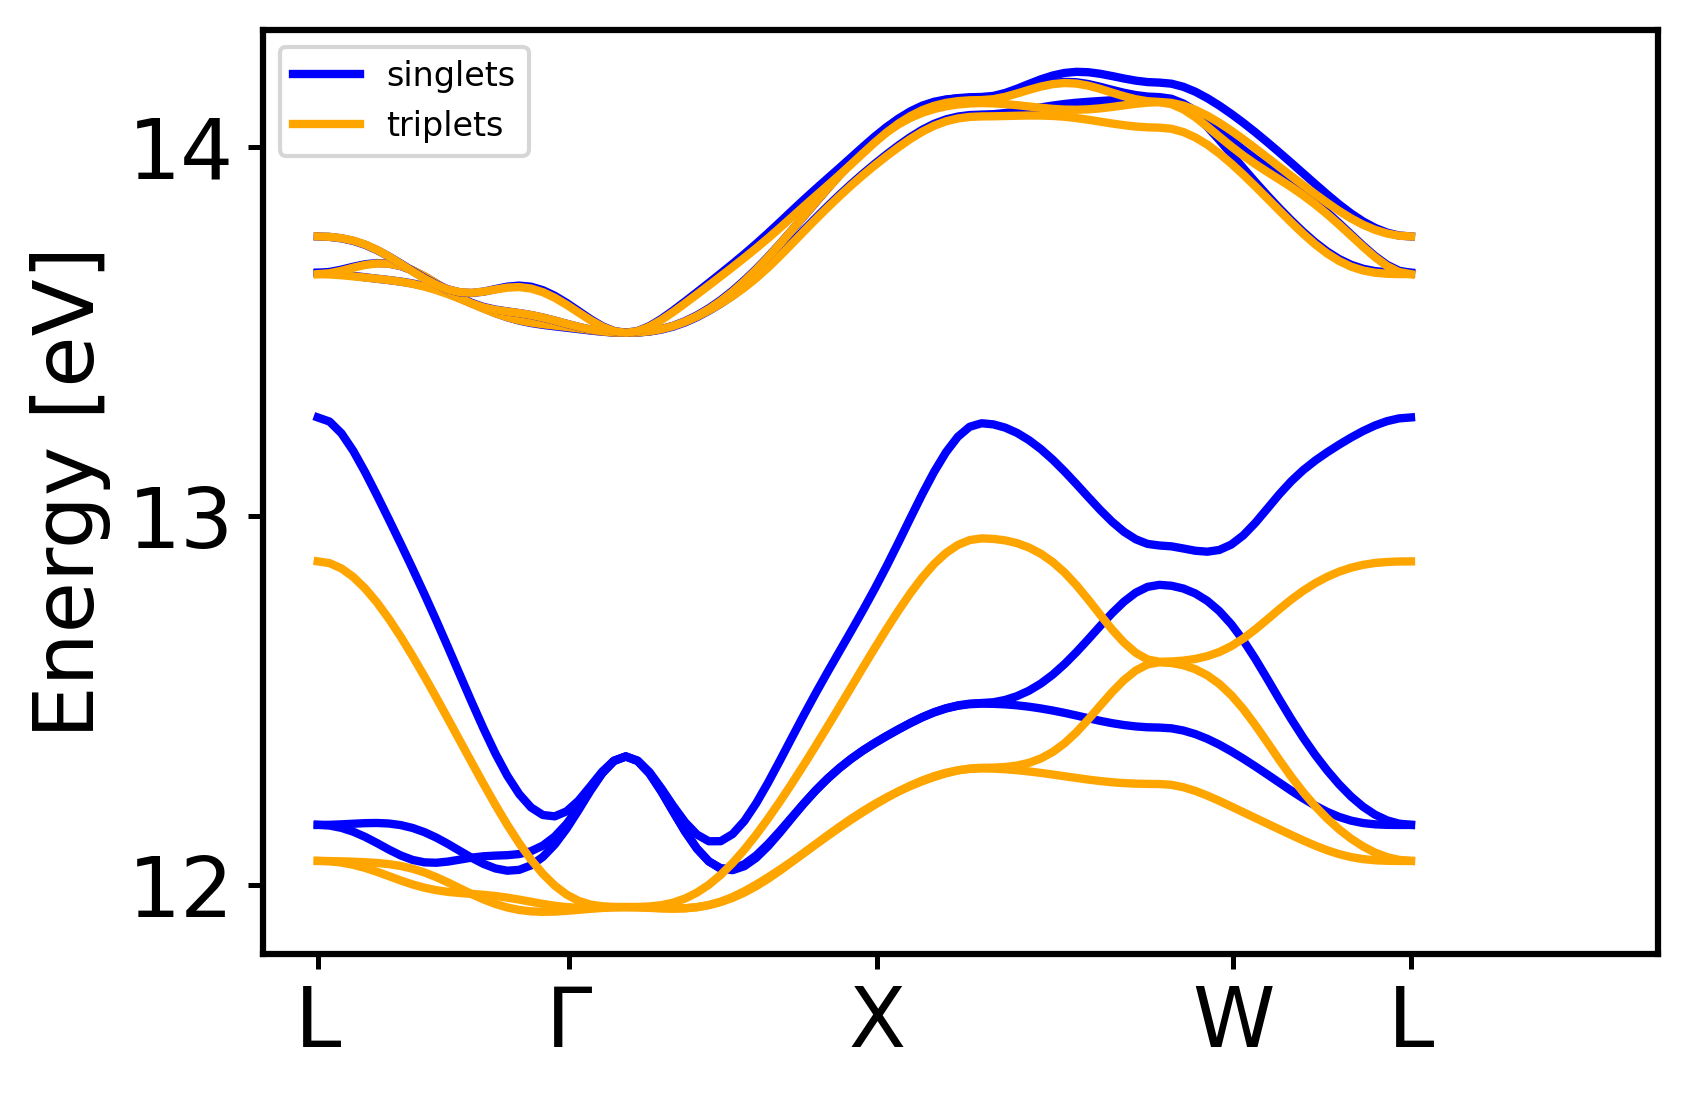

In [134]:
data_excbands_shifted_triplets = np.loadtxt(f'{YAMBO_TUT_PATH}/shifted-grid/triplets/bse-bands/o-bse-bands.excitons_interpolated', usecols=(0,1,2,3,4,5,6))
data_excbands_shifted = np.loadtxt(f'{YAMBO_TUT_PATH}/shifted-grid/bse-bands/o-bse-bands.excitons_interpolated', usecols=(0,1,2,3,4,5,6))
fig,ax =plt.subplots()
ax.plot(data_excbands_shifted[:,0], data_excbands_shifted[:,1], label='singlets', c='blue')
ax.plot(data_excbands_shifted_triplets[:,0], data_excbands_shifted_triplets[:,1], label='triplets',c='orange')
ax.plot(data_excbands_shifted[:,0], data_excbands_shifted[:,2], c ='blue')
ax.plot(data_excbands_shifted_triplets[:,0], data_excbands_shifted_triplets[:,2], c='orange')
ax.plot(data_excbands_shifted[:,0], data_excbands_shifted[:,3], c ='blue')
ax.plot(data_excbands_shifted_triplets[:,0], data_excbands_shifted_triplets[:,3], c='orange')
ax.plot(data_excbands_shifted[:,0], data_excbands_shifted[:,4], c ='blue')
ax.plot(data_excbands_shifted_triplets[:,0], data_excbands_shifted_triplets[:,4], c='orange')
ax.plot(data_excbands_shifted[:,0], data_excbands_shifted[:,5], c ='blue')
ax.plot(data_excbands_shifted_triplets[:,0], data_excbands_shifted_triplets[:,5], c='orange')
ax.plot(data_excbands_shifted[:,0], data_excbands_shifted[:,6], c ='blue')
ax.plot(data_excbands_shifted_triplets[:,0], data_excbands_shifted_triplets[:,6], c='orange')
ticks, labels =list(zip(*path_kpoints.get_indexes()))
kpoints_dists= np.array(kpoints_dists)
ax.set_xticks(kpoints_dists[np.array(ticks)], labels)
ax.set_xticks(kpoints_dists[np.array(ticks)]/np.max(kpoints_dists[np.array(ticks)])*np.max(data_excbands_unshifted[:,0]), labels)
ax.set_ylabel('Energy [eV]')
#ax.set_xlabel('$q_x$')
ax.legend(loc='upper left', fontsize=8)
plt.savefig(f'{YAMBO_TUT_PATH}/excbands_singletvstriplets.png', bbox_inches='tight')



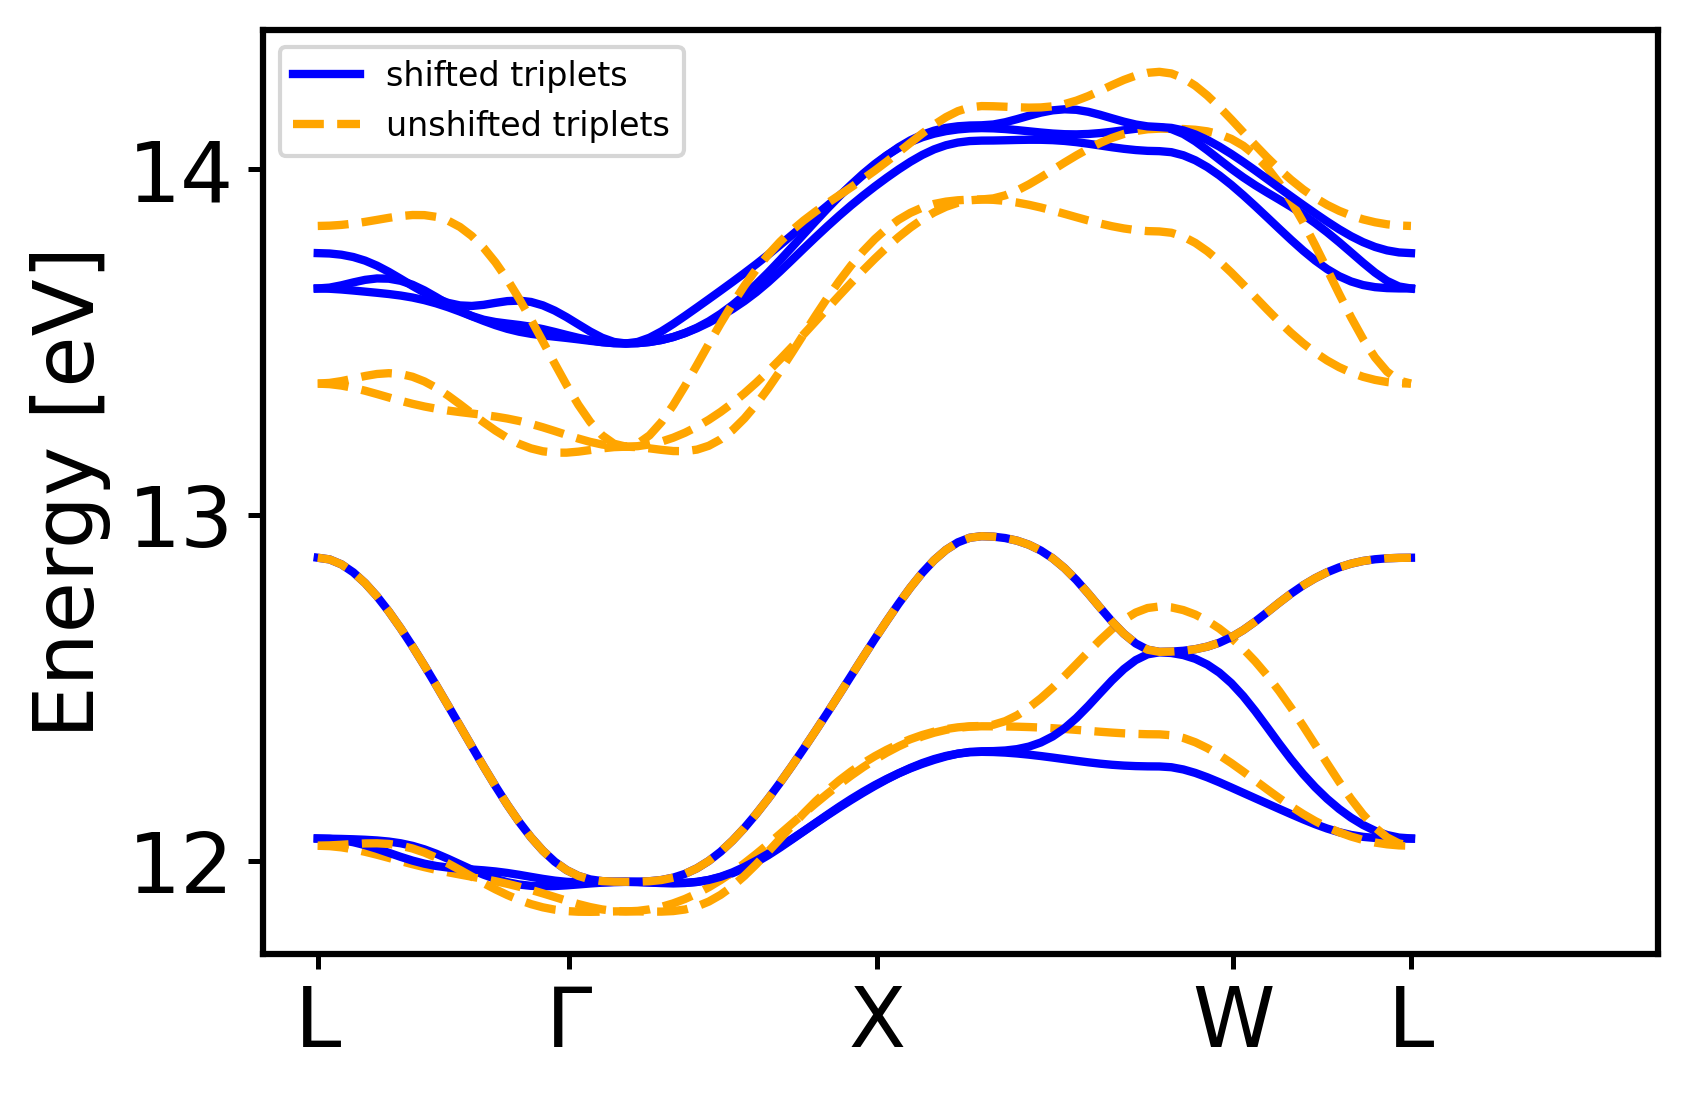

In [140]:
data_excbands_shifted_triplets = np.loadtxt(f'{YAMBO_TUT_PATH}/shifted-grid/triplets/bse-bands/o-bse-bands.excitons_interpolated', usecols=(0,1,2,3,4,5,6))
data_excbands_unshifted_triplets = np.loadtxt(f'{YAMBO_TUT_PATH}/unshifted-grid/triplets/bse-bands/o-bse-bands.excitons_interpolated', usecols=(0,1,2,3,4,5,6))
fig,ax =plt.subplots()
ax.plot(data_excbands_shifted_triplets[:,0], data_excbands_shifted_triplets[:,1], label='shifted triplets', c='blue')
ax.plot(data_excbands_unshifted_triplets[:,0], data_excbands_unshifted_triplets[:,1], ls='--',label='unshifted triplets',c='orange')
ax.plot(data_excbands_shifted_triplets[:,0], data_excbands_shifted_triplets[:,2], c ='blue')
ax.plot(data_excbands_unshifted_triplets[:,0], data_excbands_unshifted_triplets[:,2],ls='--', c='orange')
ax.plot(data_excbands_shifted_triplets[:,0], data_excbands_shifted_triplets[:,3], c ='blue')
ax.plot(data_excbands_unshifted_triplets[:,0], data_excbands_shifted_triplets[:,3],ls='--', c='orange')
ax.plot(data_excbands_shifted_triplets[:,0], data_excbands_shifted_triplets[:,4], c ='blue')
ax.plot(data_excbands_unshifted_triplets[:,0], data_excbands_unshifted_triplets[:,4],ls='--', c='orange')
ax.plot(data_excbands_shifted_triplets[:,0], data_excbands_shifted_triplets[:,5], c ='blue')
ax.plot(data_excbands_unshifted_triplets[:,0], data_excbands_unshifted_triplets[:,5], ls='--',c='orange')
ax.plot(data_excbands_shifted_triplets[:,0], data_excbands_shifted_triplets[:,6], c ='blue')
ax.plot(data_excbands_unshifted_triplets[:,0], data_excbands_unshifted_triplets[:,6], ls='--',c='orange')
ticks, labels =list(zip(*path_kpoints.get_indexes()))
kpoints_dists= np.array(kpoints_dists)
ax.set_xticks(kpoints_dists[np.array(ticks)], labels)
ax.set_xticks(kpoints_dists[np.array(ticks)]/np.max(kpoints_dists[np.array(ticks)])*np.max(data_excbands_unshifted[:,0]), labels)
ax.set_ylabel('Energy [eV]')
#ax.set_xlabel('$q_x$')
ax.legend(loc='upper left', fontsize=8)



In [71]:
bsekernelq.get_kernel_value_bands(yexcq,[4,5])*ha2ev

array([[-1.65455864e+00+5.39640674e-05j, -2.24344402e-02-7.81258904e-02j,
         1.08769995e-01+4.71768776e-02j, ...,
         2.57065042e-04+3.71644315e-04j,  1.60134825e-03-1.10370889e-03j,
        -9.75456412e-04+1.95053570e-03j],
       [-2.24344402e-02-7.81258904e-02j, -1.65690755e+00+5.40194193e-05j,
         3.20236647e-02-7.07962839e-07j, ...,
        -2.26945558e-03-7.71920044e-03j, -1.89751887e-04+4.86774255e-03j,
        -4.32910260e-03+1.34862347e-02j],
       [ 1.08769995e-01+4.71768776e-02j,  3.20236647e-02-7.07962839e-07j,
        -1.65690796e+00+5.39898268e-05j, ...,
         2.53033424e-03+7.65958611e-03j,  1.89661546e-04-4.86256047e-03j,
         4.32837525e-03-1.34872051e-02j],
       ...,
       [ 2.57065042e-04+3.71644315e-04j, -2.26945558e-03-7.71920044e-03j,
         2.53033424e-03+7.65958611e-03j, ...,
        -1.65875464e+00+5.41241562e-05j, -5.69632235e-05-1.65511877e-03j,
         5.74058891e-05+1.65511863e-03j],
       [ 1.60134825e-03-1.10370889e-03j, -1.

In [78]:
yexcq.table[-3:]

masked_array(
  data=[[62,  4,  7,  1,  1],
        [63,  4,  7,  1,  1],
        [64,  4,  7,  1,  1]],
  mask=False,
  fill_value=999999)

In [96]:
yexcq.eigenvalues

masked_array(data=[11.85346532+0.j, 11.85378109+0.j, 11.8540175 +0.j,
                   13.19670409+0.j, 13.19686387+0.j, 13.19707013+0.j,
                   13.78606588+0.j, 13.78641085+0.j, 13.78661297+0.j,
                   13.79528405+0.j, 13.79595902+0.j, 13.94144967+0.j,
                   13.94191207+0.j, 13.94201535+0.j, 13.97688468+0.j,
                   13.97735202+0.j, 13.97973456+0.j, 13.97992305+0.j,
                   13.98046612+0.j, 14.5351272 +0.j, 14.53520069+0.j,
                   14.53535701+0.j, 14.56808093+0.j, 14.56825911+0.j,
                   14.56827386+0.j, 14.58088095+0.j, 14.58099449+0.j,
                   14.70643264+0.j, 14.8582505 +0.j, 14.85836934+0.j,
                   14.85846945+0.j, 14.86271682+0.j, 14.86295038+0.j,
                   14.86370957+0.j, 15.20446238+0.j, 15.20494362+0.j,
                   15.2050202 +0.j, 15.2241273 +0.j, 15.4635963 +0.j,
                   15.4638002 +0.j, 15.46451053+0.j, 15.47755325+0.j,
                   1

In [100]:
np.min(h2p.h2peigv)

(12.444437502094095+0j)

In [101]:
h2p.BSE_table

array([[  0,   3,   4],
       [  1,   3,   4],
       [  2,   3,   4],
       ...,
       [509,   3,   4],
       [510,   3,   4],
       [511,   3,   4]])

In [104]:
yexck.table[:10]

masked_array(
  data=[[1, 2, 5, 1, 1],
        [1, 2, 6, 1, 1],
        [1, 2, 7, 1, 1],
        [1, 3, 5, 1, 1],
        [1, 3, 6, 1, 1],
        [1, 3, 7, 1, 1],
        [1, 4, 5, 1, 1],
        [1, 4, 6, 1, 1],
        [1, 4, 7, 1, 1],
        [2, 2, 5, 1, 1]],
  mask=False,
  fill_value=999999)

In [118]:
t_v = np.where(yexck.table[:,1]==4)[0]
t_c = np.where(yexck.table[:,2]==5)[0]

In [116]:
t_v[0].shape

(1536,)

In [119]:
t_vc = [t for t in t_v if t in t_c ]

In [124]:
h2p.BSE_table.shape

(512, 3)

In [134]:
bsekernelk.get_kernel_value_bands(yexck,[])

IndexError: index 675 is out of bounds for axis 0 with size 512

6